# Analisi Dataset LendingClub - Indice

## Indice dei Contenuti

### Preparazione dei Dati
1. [Caricamento e Ispezione Iniziale](#caricamento)
2. [Rinomina delle Variabili](#rinomina)
3. [Descrizione delle Variabili](#descrizione)
4. [Gestione Valori Mancanti](#valori-mancanti)
5. [Pulizia e Conversione Tipi di Dato](#conversione)

### Analisi Univariata
6. [Analisi Distribuzioni Generali](#distribuzioni-generali)
7. [Boxplot Variabili Continue](#boxplot-generali)

### Analisi Dettagliate per Variabile

#### Interest Rate
8. [Distribuzione](#interest-rate-dist)
9. [Identificazione Outliers](#interest-rate-outliers)
10. [Pulizia](#interest-rate-clean)
11. [Statistiche Descrittive](#interest-rate-stats)
12. [Analisi Asimmetria](#interest-rate-skewness)
13. [Visualizzazione Completa](#interest-rate-complete)
14. [Conclusioni](#interest-rate-conclusioni)

#### Installment
15. [Analisi Generale](#installment-analisi)
16. [Distribuzione](#installment-dist)
17. [Boxplot](#installment-boxplot)

#### Credit History Days
18. [Analisi Credit History Days](#credit_history_days)

#### FICO Score
19. [Analisi FICO Score](#fico-score)

#### Purpose
20. [Analisi Purpose](#purpose-analisi)

#### Annual Income
21. [Analisi Reddito Annuale](#annual-income)

#### DTI
22. [Analisi DTI](#dti-analisi)

### Analisi Multivariata
23. [Analisi Multivariata](#analisi-multivariata)
24. [Analisi DTI](#1-analisi-dti-debt-to-income-ratio)
25. [Analisi Interest Rate](#2-analisi-interest-rate)
26. [Analisi FICO Score](#3-analisi-fico-score)
27. [Analisi Congiunta](#4-analisi-congiunta-joint-distributions)
28. [Sintesi delle Associazioni](#5-sintesi-delle-associazioni)

---

<a id="caricamento"></a>
# Analisi Esplorativa del Dataset LendingClub

Iniziamo l'esplorazione del dataset che contiene informazioni sui prestiti concessi da LendingClub. L'obiettivo è:
1. Caricare e visualizzare la struttura del dataset
2. Comprendere le variabili disponibili
3. Identificare eventuali problemi nei dati

Prima fase: caricamento del dataset e ispezione delle colonne per capire quali trasformazioni saranno necessarie.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loans.csv')

data.columns

Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

<a id="rinomina"></a>
# Rinomina delle Variabili per Maggiore Chiarezza

I nomi originali delle colonne contengono punti e abbreviazioni che possono rendere il codice meno leggibile e potenzialmente causare problemi. Procediamo a:

1. Rimuovere i punti dai nomi delle colonne
2. Utilizzare il formato snake_case (standard in Python)
3. Rendere i nomi più descrittivi e comprensibili
4. Mantenere alcuni acronimi standard del settore (es. FICO, DTI)

In [67]:
new_columns = {
    'customer.id': 'customer_id',
    'credit.policy': 'credit_policy', 
    'purpose': 'purpose',
    'int.rate': 'interest_rate',
    'installment': 'installment',
    'log.annual.inc': 'log_annual_income',
    'dti': 'dti',         
    'fico': 'fico_score',             
    'days.with.cr.line': 'credit_history_days',
    'revol.bal': 'revolving_balance',
    'revol.util': 'revolving_util',
    'inq.last.6mths': 'inquiries_last_6m',
    'delinq.2yrs': 'delinquencies_2y',
    'pub.rec': 'public_records',
    'not.fully.paid': 'not_fully_paid'
}

data = data.rename(columns=new_columns)


print(data.columns.tolist())

['customer_id', 'credit_policy', 'purpose', 'interest_rate', 'installment', 'log_annual_income', 'dti', 'fico_score', 'credit_history_days', 'revolving_balance', 'revolving_util', 'inquiries_last_6m', 'delinquencies_2y', 'public_records', 'not_fully_paid']


<a id="descrizione"></a>
## Descrizione delle Variabili

- **customer_id**: Identificatore univoco del cliente
- **credit_policy**: Flag binario (0/1) che indica se il cliente soddisfa i criteri della politica creditizia
- **purpose**: Scopo dichiarato del prestito (es. consolidamento debiti, carta di credito, etc.)
- **interest_rate**: Tasso di interesse applicato al prestito (percentuale)
- **installment**: Importo della rata mensile del prestito
- **log_annual_income**: Logaritmo naturale del reddito annuale del cliente
- **dti**: Debt-to-Income ratio - Rapporto tra debito mensile totale e reddito mensile
- **fico_score**: Punteggio creditizio FICO (range 300-850)
- **credit_history_days**: Numero di giorni trascorsi dall'apertura della prima linea di credito
- **revolving_balance**: Saldo corrente sulle linee di credito revolving
- **revolving_util**: Tasso di utilizzo del credito revolving (saldo/limite di credito)
- **inquiries_last_6m**: Numero di richieste di informazioni creditizie negli ultimi 6 mesi
- **delinquencies_2y**: Numero di ritardi nei pagamenti negli ultimi 2 anni
- **public_records**: Numero di eventi negativi nei registri pubblici (fallimenti, pignoramenti, etc.)
- **not_fully_paid**: Variabile binaria che indica se il prestito è stato completamente rimborsato (0) o no (1)

# DA RIVEDERE INTEREST RATE SE HA SENSO ESSERE 0

In [68]:
data.head(10)

customer_id credit_policy             purpose  interest_rate  installment  \
0        10001             1  debt_consolidation         0.1189       829.10   
1        10002             1         credit_card         0.1071       228.22   
2        10003             1  debt_consolidation         0.1357       366.86   
3        10004             1  debt_consolidation         0.1008       162.34   
4        10005             1         credit_card         0.1426       102.92   
5        10006             1         credit_card         0.0788       125.13   
6        10007             1  debt_consolidation         0.1496       194.02   
7        10008             1           all_other         0.1114       131.22   
8        10009             1    home_improvement         0.1134        87.19   
9        10010             1  debt_consolidation         0.1221        84.12   

   log_annual_income    dti  fico_score  credit_history_days  \
0          11.350407  19.48         737          5639.958333   
1          11.082143  14.29         707          2760.000000   
2          10.373491  11.63         682          4710.000000   
3          11.350407    8.1         712          2699.958333   
4          11.299732  14.97         667          4066.000000   
5          11.904968  16.98         727          6120.041667   
6          10.714418      4         667          3180.041667   
7          11.002100  11.08         722          5116.000000   
8          11.407565  17.25         682          3989.000000   
9          10.203592     10         707          2730.041667   

   revolving_balance revolving_util  inquiries_last_6m delinquencies_2y  \
0            28854.0           52.1                0.0                0   
1            33623.0           76.7                0.0                0   
2             3511.0           25.6                1.0                0   
3            33667.0           73.2                1.0                0   
4             4740.0           39.5                0.0                1   
5            50807.0             51                0.0                0   
6             3839.0           76.8                0.0                0   
7            24220.0           68.6                0.0                0   
8            69909.0           51.1                1.0                0   
9             5630.0             23                1.0                0   

  public_records  not_fully_paid  
0              0               0  
1              0               0  
2              0               0  
3              0               0  
4              0               0  
5              0               0  
6              1               1  
7              0               1  
8              0               0  
9              0               0

In [69]:
print(len(data))

9578


# Analisi Preliminare dei Valori Nulli

Dall'ispezione iniziale emerge che i valori 0 nel dataset hanno un significato semantico e non rappresentano dati mancanti. Per esempio:
- 0 in `credit_policy` indica che il cliente non soddisfa i criteri
- 0 in `delinquencies_2y` indica assenza di ritardi nei pagamenti
- 0 in `public_records` indica assenza di eventi negativi

Questi valori sono quindi significativi per l'analisi e non devono essere trattati come dati mancanti.

<a id="valori-mancanti"></a>
# Gestione dei Valori Mancanti

Durante la fase di pulizia dei dati, abbiamo identificato alcuni valori mancanti nel dataset. Data la dimensione significativa del dataset, abbiamo due opzioni principali:

1. **Approccio Immediato**: 
   - Procedere con l'analisi usando solo i record completi
   - Utile per una prima esplorazione dei dati

2. **Approccio Successivo**:
   - Analizzare il pattern dei valori mancanti
   - Valutare tecniche di imputazione appropriate (media, mediana, KNN)
   - Considerare l'impatto dei valori mancanti sulle analisi successive

La scelta dipenderà dalla quantità di dati mancanti e dal loro impatto sulle variabili di interesse.

In [70]:
missing = data[data['customer_id']==0]

print(len(missing))

0


In [71]:
data.loc[30]

customer_id                         10031
credit_policy                           1
purpose                debt_consolidation
interest_rate                      0.0807
installment                        156.84
log_annual_income               11.512925
dti                                   2.3
fico_score                            742
credit_history_days           3148.958333
revolving_balance                  9698.0
revolving_util                       19.4
inquiries_last_6m                     0.0
delinquencies_2y                        0
public_records                          0
not_fully_paid                          0
Name: 30, dtype: object

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          9578 non-null   int64  
 1   credit_policy        9578 non-null   object 
 2   purpose              9578 non-null   object 
 3   interest_rate        9578 non-null   float64
 4   installment          9578 non-null   float64
 5   log_annual_income    9573 non-null   float64
 6   dti                  9578 non-null   object 
 7   fico_score           9578 non-null   int64  
 8   credit_history_days  9549 non-null   float64
 9   revolving_balance    9577 non-null   float64
 10  revolving_util       9516 non-null   object 
 11  inquiries_last_6m    9548 non-null   float64
 12  delinquencies_2y     9549 non-null   object 
 13  public_records       9549 non-null   object 
 14  not_fully_paid       9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
mem

In [73]:
data.describe()

customer_id  interest_rate  installment  log_annual_income  \
count   9578.000000    9578.000000  9578.000000        9573.000000   
mean   14789.500000       0.125529   319.089413          10.931892   
std     2765.074773       0.202225   207.071301           0.614766   
min    10001.000000       0.060000    15.670000           7.547502   
25%    12395.250000       0.103900   163.770000          10.558414   
50%    14789.500000       0.122100   268.950000          10.928238   
75%    17183.750000       0.140700   432.762500          11.289832   
max    19578.000000      14.700000   940.140000          14.528354   

        fico_score  credit_history_days  revolving_balance  inquiries_last_6m  \
count  9578.000000          9549.000000       9.577000e+03        9548.000000   
mean    711.159532          4562.026085       1.691529e+04           1.571743   
std      42.024737          2497.985733       3.375770e+04           2.198151   
min     612.000000           178.958333       0.000000e+00           0.000000   
25%     682.000000          2820.000000       3.187000e+03           0.000000   
50%     707.000000          4139.958333       8.596000e+03           1.000000   
75%     737.000000          5730.000000       1.825200e+04           2.000000   
max    1812.000000         17639.958330       1.207359e+06          33.000000   

       not_fully_paid  
count     9578.000000  
mean         0.160054  
std          0.366676  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

<a id="conversione"></a>
# Pulizia e Conversione dei Tipi di Dato

Alcune variabili sono state importate con tipo `object` ma rappresentano dati numerici. È necessario convertirle al tipo appropriato per:

1. **Ottimizzare la Memoria**:
   - I tipi corretti occupano meno spazio
   - Migliorano le performance delle operazioni

2. **Abilitare Operazioni Matematiche**:
   - Calcolo di statistiche descrittive
   - Analisi numeriche e grafici

3. **Garantire la Consistenza**:
   - Variabili binarie come `Int64`
   - Percentuali e rapporti come `float`
   - Conteggi come `Int64`

Le conversioni verranno effettuate usando `pd.to_numeric()` con gestione appropriata degli errori.

In [74]:
# Convertiamo i tipi di dato corretti
# credit.policy dovrebbe essere int (0 o 1)
data['credit_policy'] = pd.to_numeric(data['credit_policy'], errors='coerce').astype('Int64')

# dti (debt-to-income ratio) dovrebbe essere float
data['dti'] = pd.to_numeric(data['dti'], errors='coerce')

# revol.util (revolving utilization) dovrebbe essere float
data['revolving_util'] = pd.to_numeric(data['revolving_util'], errors='coerce')

# delinq.2yrs dovrebbe essere int (numero di ritardi)
data['delinquencies_2y'] = pd.to_numeric(data['delinquencies_2y'], errors='coerce').astype('Int64')

# pub.rec dovrebbe essere int (numero di registrazioni pubbliche)
data['public_records'] = pd.to_numeric(data['public_records'], errors='coerce').astype('Int64')

print(f"Valori mancanti per colonna:")
percent_missing = data.isnull().mean() * 100

for col, pct in percent_missing.items():
    print(f"{col}: {pct:.2f}%")


Valori mancanti per colonna:
customer_id: 0.00%
credit_policy: 0.02%
purpose: 0.00%
interest_rate: 0.00%
installment: 0.00%
log_annual_income: 0.05%
dti: 0.01%
fico_score: 0.00%
credit_history_days: 0.30%
revolving_balance: 0.01%
revolving_util: 0.66%
inquiries_last_6m: 0.31%
delinquencies_2y: 0.31%
public_records: 0.31%
not_fully_paid: 0.00%


In [75]:
# Rimuoviamo le righe con valori mancanti
data = data.dropna()

print(f"Dimensione dataset dopo rimozione NaN: {len(data)} righe")
print(f"\nVerifica valori mancanti per colonna:")
print(data.isnull().sum())

Dimensione dataset dopo rimozione NaN: 9508 righe

Verifica valori mancanti per colonna:
customer_id            0
credit_policy          0
purpose                0
interest_rate          0
installment            0
log_annual_income      0
dti                    0
fico_score             0
credit_history_days    0
revolving_balance      0
revolving_util         0
inquiries_last_6m      0
delinquencies_2y       0
public_records         0
not_fully_paid         0
dtype: int64


<a id="distribuzioni-generali"></a>
# Analisi Univariata delle Distribuzioni

Analizziamo la distribuzione di tutte le variabili numeriche nel dataset, dividendole in due categorie:

1. **Variabili Continue**:
   - `interest_rate`: Tasso di interesse
   - `installment`: Rata mensile
   - `log_annual_income`: Reddito (log)
   - `dti`: Rapporto debito/reddito
   - `fico_score`: Punteggio creditizio
   - `credit_history_days`: Durata storia creditizia
   - `revolving_balance`: Saldo revolving
   - `revolving_util`: Utilizzo linee revolving

2. **Variabili Discrete** (categoriche o conteggi):
   - `credit_policy`: Binaria (0/1)
   - `delinquencies_2y`: Conteggio ritardi
   - `public_records`: Conteggio eventi negativi
   - `not_fully_paid`: Binaria (0/1)

Per ogni variabile continua calcoleremo e visualizzeremo:
- Distribuzione (istogramma + densità kernel)
- Statistiche principali (media, mediana)
- Indici di forma (asimmetria, curtosi)
- Dispersione (deviazione standard)

Per le variabili discrete mostreremo:
- Distribuzioni di frequenza
- Proporzioni delle diverse categorie

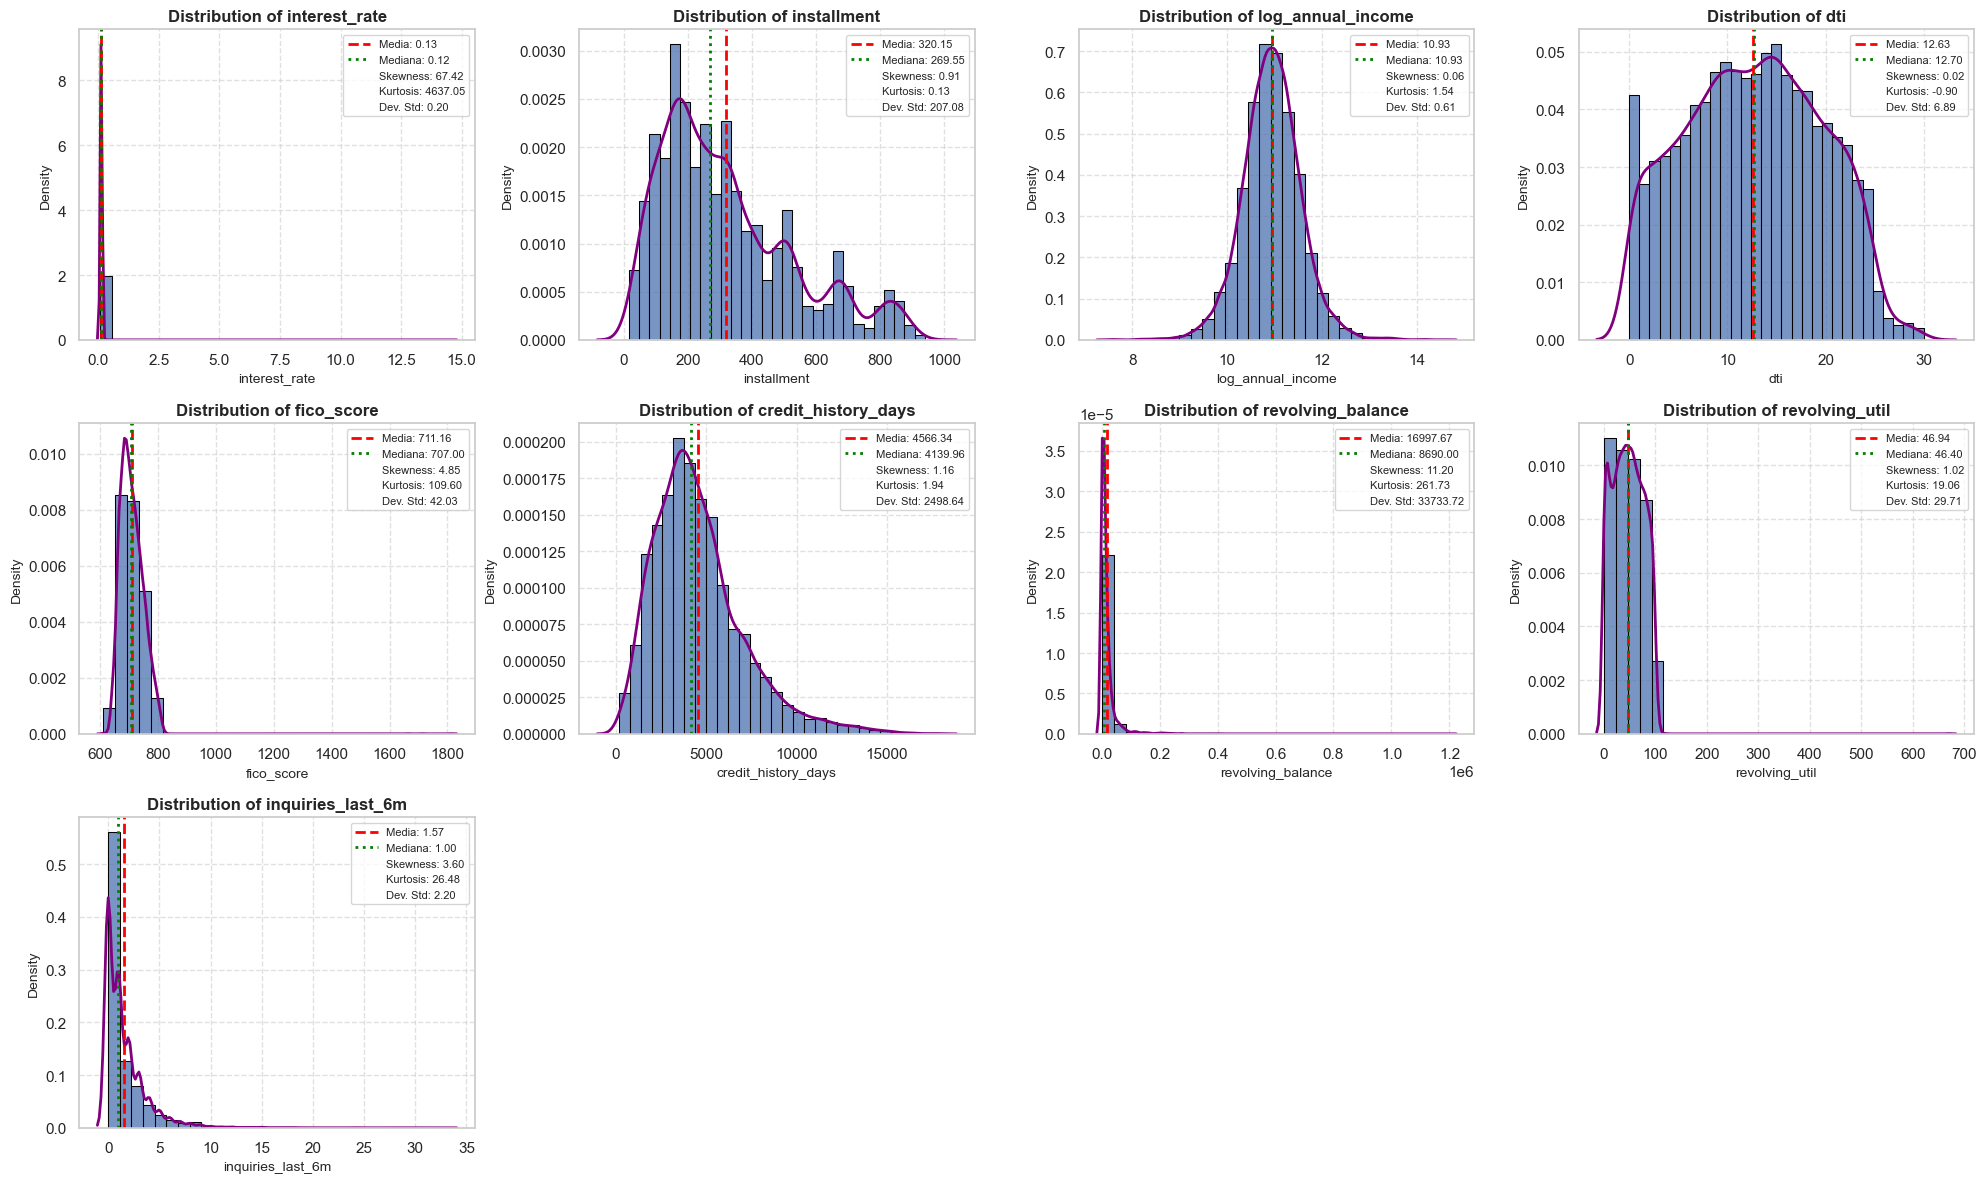

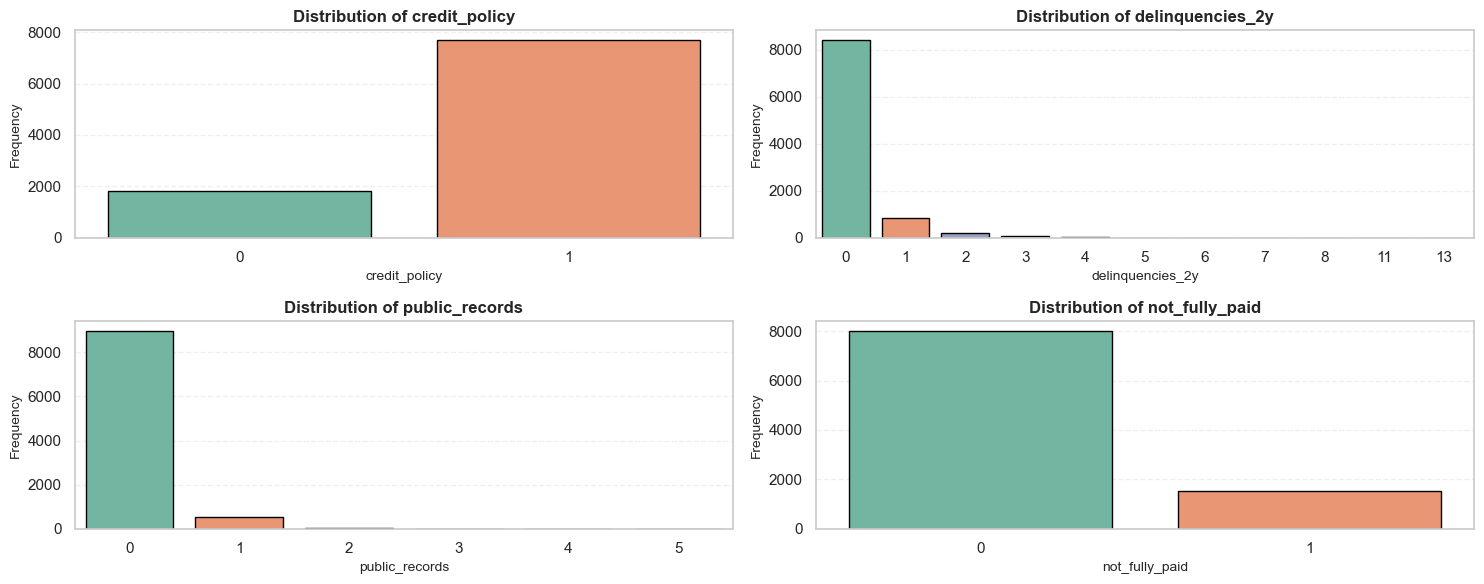

In [76]:

# Separiamo colonne continue e discrete
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('customer_id')
discrete_cols = ['credit_policy', 'delinquencies_2y', 'public_records', 'not_fully_paid']
continuous_cols = [col for col in numeric_cols if col not in discrete_cols]

# Griglia per variabili CONTINUE (istogramma + KDE)
n_cols_cont = len(continuous_cols)
n_rows_cont = int(np.ceil(n_cols_cont / 4))

plt.figure(figsize=(20, n_rows_cont * 4))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows_cont, 4, i+1)
    vals = data[col].dropna()
    bins = np.linspace(vals.min(), vals.max(), 30)
    
    ax = sns.histplot(vals, bins=bins, edgecolor="black", stat='density', kde=False)
    sns.kdeplot(vals, color='purple', lw=2, ax=ax)
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    
    # Calcoliamo le statistiche
    mean_val = vals.mean()
    median_val = vals.median()
    skew_val = vals.skew()  
    kurt_val = vals.kurt()
    std_val = vals.std()
    
    # Linee verticali per media e mediana
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    # Statistiche nella legenda
    plt.plot([], [], ' ', label=f'Skewness: {skew_val:.2f}')
    plt.plot([], [], ' ', label=f'Kurtosis: {kurt_val:.2f}')
    plt.plot([], [], ' ', label=f'Dev. Std: {std_val:.2f}')
    
    plt.legend(fontsize=8, loc='best')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

# Griglia per variabili DISCRETE (bar plot)
n_cols_disc = len(discrete_cols)
n_rows_disc = int(np.ceil(n_cols_disc / 2))

plt.figure(figsize=(15, n_rows_disc * 3))

for i, col in enumerate(discrete_cols):
    plt.subplot(n_rows_disc, 2, i+1)
    sns.countplot(data=data, x=col, hue=col, palette='Set2', legend=False, edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

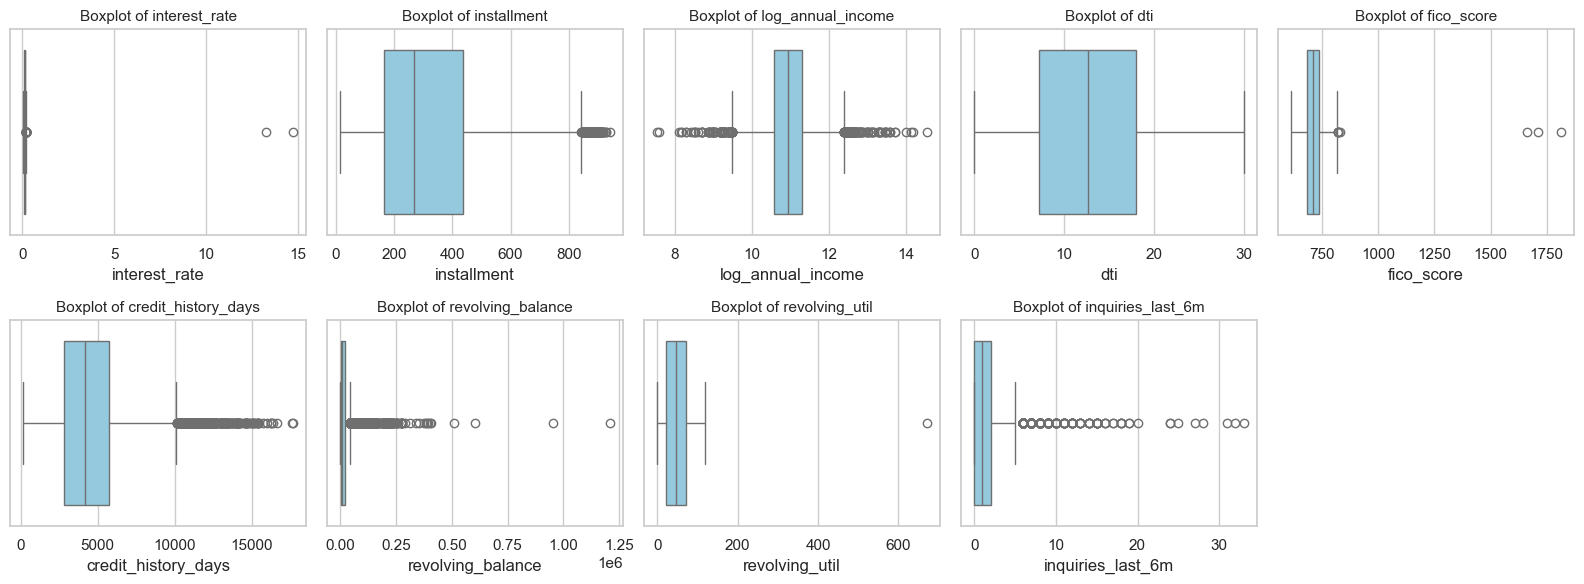

In [77]:
plt.figure(figsize=(16, 6))
for idx, col in enumerate(continuous_cols):
    plt.subplot(2, int(np.ceil(len(continuous_cols)/2)), idx+1)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=11)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<a id="boxplot-generali"></a>
QUELLO CHE VOGLIO FARE E': andiamo ad analizzzare ad uno ad uno le variabili. vediamo se ci sono variabili mancanti o outlier e vediamo anche in percentuale.

<a id="interest-rate-dist"></a>
# ANALISI INTEREST_RATE (TASSO DI INTERESSE)

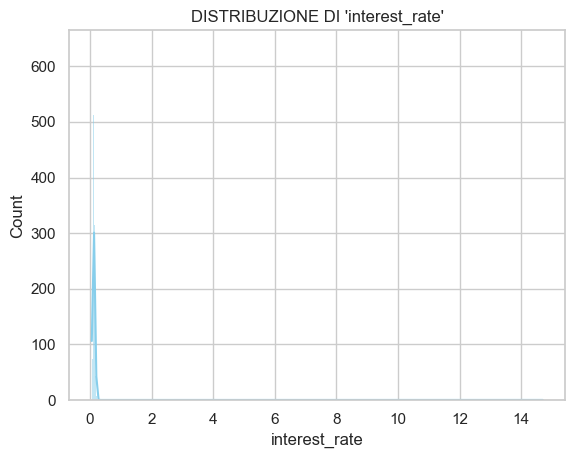

count    9508.000000
mean        0.125583
std         0.202949
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max        14.700000
Name: interest_rate, dtype: float64


In [78]:
sns.histplot(data=data, x='interest_rate', kde=True, color='skyblue')
plt.title("DISTRIBUZIONE DI 'interest_rate'")
plt.show()

print(data['interest_rate'].describe())  #Questo ti mostra:se i valori sono sbilanciati o anomali (outlier),se ci sono valori estremi o zero sospetti.


Troviamo 9578 osservazioni!
La deviazione standard si discosta molto dalla media e anche il  valore max è anomalo!! 
Questo potrebbe indicare la presenza di valori anomali o outliers.

<a id="interest-rate-outliers"></a>
Visualizziamoli tramite BOXPLOT

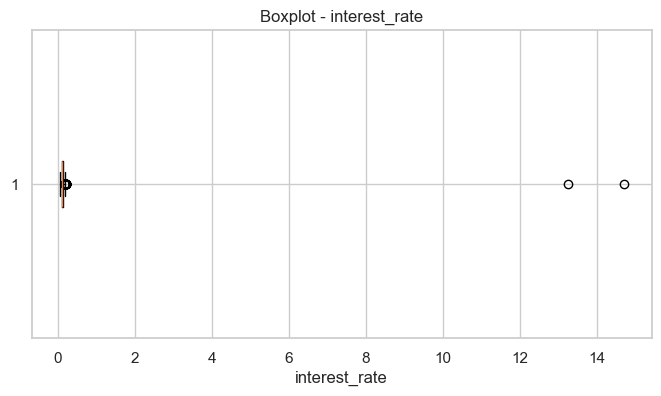

In [79]:
plt.figure(figsize=(8,4))
plt.boxplot(data['interest_rate'], vert=False)
plt.title('Boxplot - interest_rate')
plt.xlabel('interest_rate')
plt.show()


Abbiamo molti valori vicino lo zero e osserviamo come altri sono distaccati e arrivano fino a 14 il chè è strano.
Per cui andiamo a calcolare gli intervalli.

In [80]:
Q1 = data['interest_rate'].quantile(0.25)
Q3 = data['interest_rate'].quantile(0.75)
IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite inferiore: {lower_bound:.4f}')
print(f'Limite superiore: {upper_bound:.4f}')

Limite inferiore: 0.0487
Limite superiore: 0.1959


Abbiamo un tasso di interesse tra il 4.9% e 19.6% siamo in un intervallo 'normale'. 
Ma poco fa abbiamo visto avere dei valori molto alti. Andiamo a controllare gli oulier

In [81]:
lower_outlier = data[data['interest_rate'] < lower_bound]

# Filtrare gli upper outliers
upper_outlier = data[data['interest_rate'] > upper_bound]

print("Numero di lower outliers:", len(lower_outlier))
print("Numero di upper outliers:", len(upper_outlier))

Numero di lower outliers: 0
Numero di upper outliers: 53


In [82]:
outliers = data[(data['interest_rate'] < lower_bound) | (data['interest_rate'] > upper_bound)]
print(f'NUMERO DI OUTLIERS TROVATI : {outliers.shape[0]}') 

NUMERO DI OUTLIERS TROVATI : 53


In [83]:
print("Esempi di outlier:")
print(outliers['interest_rate'].head())

Esempi di outlier:
170     14.7000
801     13.2500
2945     0.2086
3713     0.2011
3991     0.2011
Name: interest_rate, dtype: float64


<a id="interest-rate-clean"></a>
Proviamo a pulirlo ovvero togliere gli outliers

In [84]:
total_count = len(data)
outliers_count = len(outliers)

data_clean = data[(data['interest_rate'] >= lower_bound) & (data['interest_rate'] <= upper_bound)]
print(f'DIMENSIONE DATASET PULITO (SENZA OUTLIERS) : {data_clean.shape[0]} righe')

cleaned_count = len(data_clean)
removed_percentage = (outliers_count / total_count) * 100

print(f"Percentuale di outliers rimossi: {removed_percentage:.2f}%")

DIMENSIONE DATASET PULITO (SENZA OUTLIERS) : 9455 righe
Percentuale di outliers rimossi: 0.56%


Adesso abbiamo un dataset comunque molto grande ma più pulito!!                                                                                              Rimuovendo gli outliers andiamo a visualizzare in maniera più chiara  i nostri dati.

<a id="interest-rate-stats"></a>
ADESSO CALCOLIAMO LE STATISTICHE DOPO AVER TOLTO GLI OUTLIERS

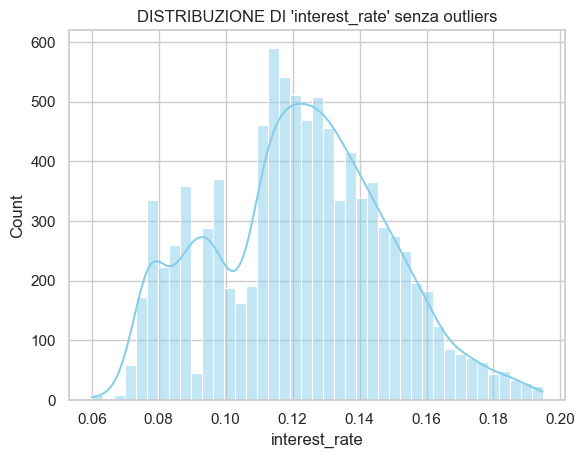

count    9455.000000
mean        0.122231
std         0.026207
min         0.060000
25%         0.103900
50%         0.122100
75%         0.139200
max         0.194700
Name: interest_rate, dtype: float64


In [85]:
sns.histplot(data=data_clean, x='interest_rate', kde=True, color='skyblue')
plt.title("DISTRIBUZIONE DI 'interest_rate' senza outliers")
plt.show()

print(data_clean['interest_rate'].describe())

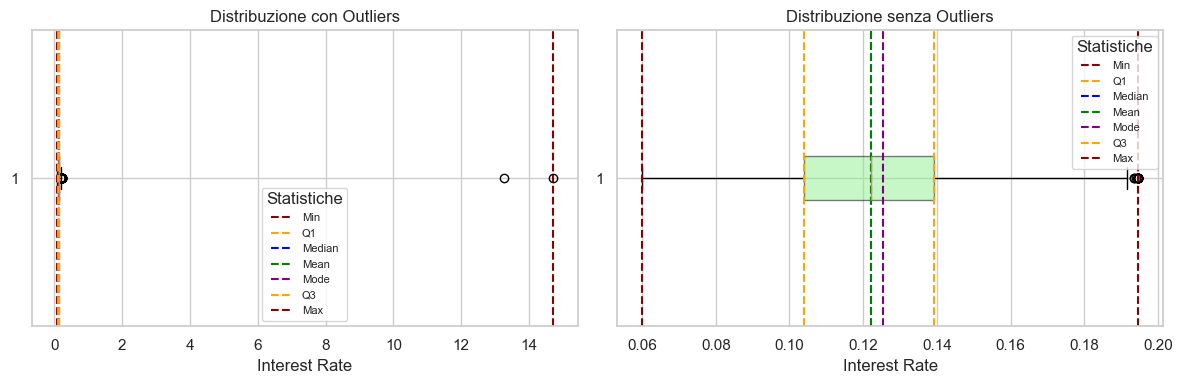

In [86]:
def get_stats(series):
    return {
        "Min": series.min(),
        "Q1": series.quantile(0.25),
        "Median": series.median(),
        "Mean": series.mean(),
        "Mode": series.mode()[0],
        "Q3": series.quantile(0.75),
        "Max": series.max()
    }

stats_out = get_stats(data['interest_rate'])
stats_clean = get_stats(data_clean['interest_rate'])

colors = {
    "Min": "darkred",
    "Q1": "orange",
    "Median": "blue",
    "Mean": "green",
    "Mode": "purple",
    "Q3": "orange",
    "Max": "darkred"
}

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(data['interest_rate'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.5))
axes[0].set_title("Distribuzione con Outliers")
axes[0].set_xlabel("Interest Rate")

for key, value in stats_out.items():
    axes[0].axvline(value, color=colors[key], linestyle='--', linewidth=1.5, label=key)

handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys(), fontsize=8, title='Statistiche')

axes[1].boxplot(data_clean['interest_rate'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.5))
axes[1].set_title("Distribuzione senza Outliers")
axes[1].set_xlabel("Interest Rate")

for key, value in stats_clean.items():
    axes[1].axvline(value, color=colors[key], linestyle='--', linewidth=1.5, label=key)

handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys(), fontsize=8, title='Statistiche')

plt.tight_layout()
plt.show()


Notiamo che la deviazione standard è diminuita dopo la pulizia rendendo i valori della variabile più omogeni. 
Così anche il valore massimo che è un pò più realistico...
Tuttavia troviamo un'asimmetria verso destra (right-skewed), con un picco principale intorno a 0.12.

<a id="interest-rate-skewness"></a>
Calcoliamo la Skewness e Curtosi

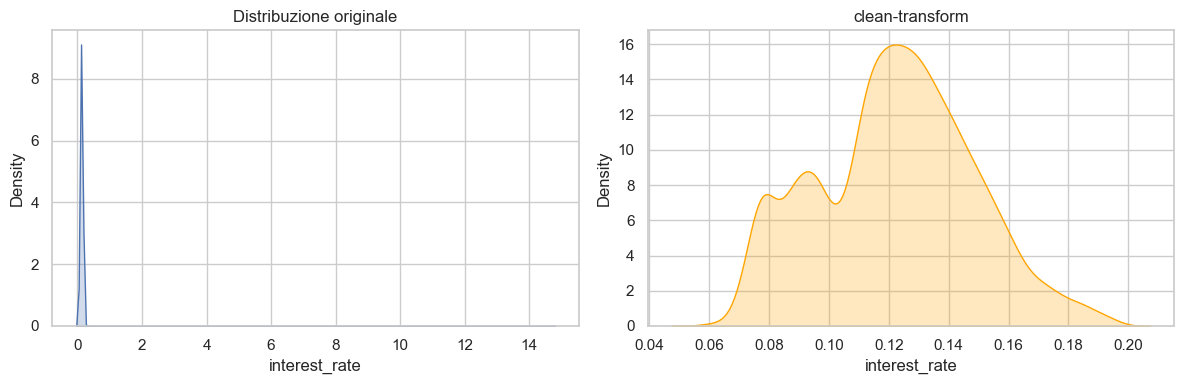


INTEREST_RATE

Prima:
Asimmetria_Skewness: 67.42 | Kurtosis: 4637.05

Dopo:
Asimmetria_Skewness: 0.06 | Kurtosis: -0.44


In [87]:
sns.set(style="whitegrid")

skew = data['interest_rate'].skew()
kurt = data['interest_rate'].kurt()

skew = data_clean['interest_rate'].skew()
kurt = data_clean['interest_rate'].kurt()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(data['interest_rate'], ax=axes[0], fill=True)
axes[0].set_title('Distribuzione originale')

sns.kdeplot(data_clean['interest_rate'], ax=axes[1], fill=True, color='orange')
axes[1].set_title('clean-transform')

plt.tight_layout()
plt.show()

for col in ['interest_rate']:
    print(f"\n{col.upper()}")
    print("\nPrima:")
    print(f"Asimmetria_Skewness: {data[col].skew():.2f} | Kurtosis: {data[col].kurt():.2f}")
    print("\nDopo:")
    print(f"Asimmetria_Skewness: {data_clean[col].skew():.2f} | Kurtosis: {data_clean[col].kurt():.2f}")

Skewness = 0.07 è molto vicina a 0, quindi la distribuzione è quasi simmetrica.
Tuttavia, essendo leggermente positiva, indica una piccola coda a destra, cioè ci sono alcuni valori di interest_rate un po’ più alti che spingono leggermente la media sopra la mediana.

La media e la mediana sono molto vicine, confermando la quasi simmetria, la leggera differenza tra le due è coerente con lo skewness positivo di 0.07.



La distribuzione del tasso d’interesse è molto equilibrata, con una forma quasi normale, e senza evidenti distorsioni.
Questo significa che non ci sono forti estremi che influenzano i valori medi.

In un contesto finanziario, ciò suggerisce una stabilità nei tassi d’interesse e assenza di forti valori anomali residui dopo la pulizia.

Un valore negativo di curtosi indica che la distribuzione è platicurtica.
La distribuzione ha un picco più piatto (e spesso più largo) rispetto alla distribuzione normale.
La distribuzione ha code più leggere (cioè, valori estremi meno probabili) rispetto alla distribuzione normale. In questo contesto, le osservazioni sono più concentrate intorno alla media, ma in modo meno "appuntito" di una curva a campana ideale.

La distribuzione del Tasso di Interesse è bimodale, suggerendo l'esistenza di due sottogruppi distinti di tassi.

<a id="interest-rate-complete"></a>
VISUALIZZIAMO LE STATISTICHE DESCRITTIVE

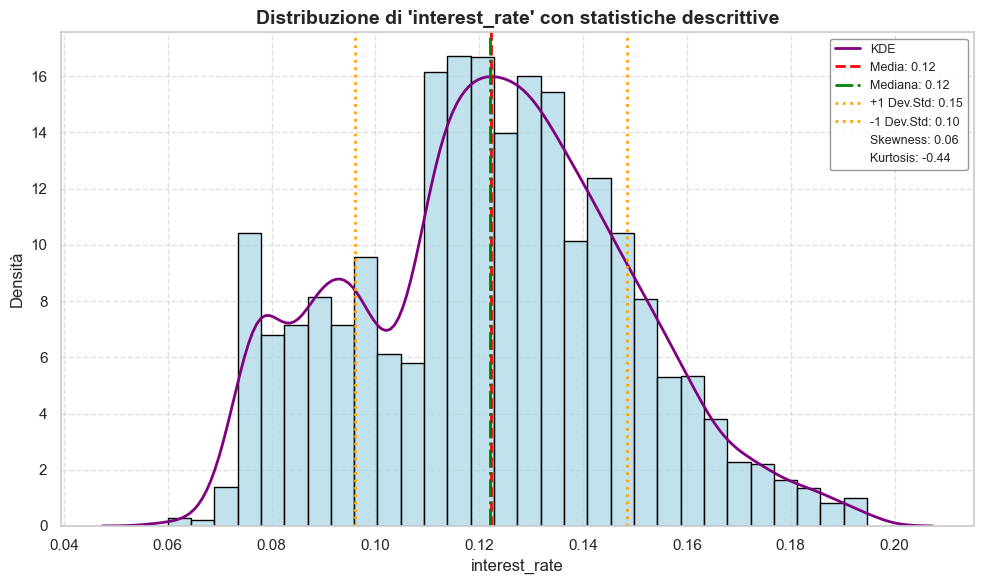

In [88]:
colonna = 'interest_rate'

vals = data_clean[colonna].dropna()

mean_dc = vals.mean()
median_dc = vals.median()
skewness = vals.skew()
kurtosis = vals.kurt()
std_dc = vals.std()


plt.figure(figsize=(10, 6))

sns.histplot(vals, bins=30, color='lightblue', edgecolor='black', stat='density', kde=False)
sns.kdeplot(vals, color='purple', lw=2, label='KDE')

plt.axvline(mean_dc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_dc:.2f}')
plt.axvline(median_dc, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {median_dc:.2f}')
plt.axvline(mean_dc + std_dc, color='orange', linestyle=':', linewidth=2, label=f'+1 Dev.Std: {(mean_dc + std_dc):.2f}')
plt.axvline(mean_dc - std_dc, color='orange', linestyle=':', linewidth=2, label=f'-1 Dev.Std: {(mean_dc - std_dc):.2f}')

plt.plot([], [], ' ', label=f'Skewness: {skewness:.2f}')
plt.plot([], [], ' ', label=f'Kurtosis: {kurtosis:.2f}')

plt.title(f"Distribuzione di '{colonna}' con statistiche descrittive", fontsize=14, fontweight='bold')
plt.xlabel(colonna, fontsize=12)
plt.ylabel("Densità", fontsize=12)
plt.legend(fontsize=9, loc='best', frameon=True, facecolor='white', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Quindi il tasso di interesse (INTEREST RATE) medio nel nostro dataset è del 12,5% con la maggior parte dei valori compresi tra il 10% e il 14%
I tassi estremi oltre 20% sono rari, mentre valori sotto 6% rappresentano casi eccezionali o particolarmente favorevoli.

<a id="interest-rate-conclusioni"></a>
<font size="6">CONCLUSIONI</font>

<font size="4">PRIMA DEL CLEANING

Il mercato (o dataset) iniziale sembrava contenere casi estremi o anomali, che avrebbero potuto far pensare a condizioni di credito o rendimento completamente irrealistiche e quindi avrebbero falsato qualsiasi conclusione su costi del capitale o politiche monetarie.

La distribuzione iniziale del tasso di interesse era fortemente distorta verso destra (Skewness = 67.65) e molto appuntita (Kurtosis = 4669.57),ciò indica la presenza di pochi valori estremamente elevati (outlier), che spingono la media verso l'alto.
Il massimo di 14.7 (1.470%) è anomalo: in termini economici, un tasso di interesse così alto non è realistico per strumenti finanziari normali (es. prestiti, mutui o rendimenti su investimenti standard).
Si tratta di errori di inserimento o valori fuori scala.

DOPO IL CLEANING

Il mercato dei tassi d'interesse appare stabile e coerente.
In altre parole, non ci sono più estremi di rischio o casi anomali e il sistema sembra equilibrato e regolare.

Dopo la rimozione degli outlier, la distribuzione risulta centrata attorno al 12.2%, con una deviazione standard molto bassa (≈ 2.6%).
Skewness ≈ 0 e Kurtosis ≈ -0.45 → la distribuzione è simmetrica e leggermente platicurtica (piatta).
Questo suggerisce una maggiore omogeneità nei tassi dove la maggior parte si concentra in un intervallo ristretto (10%–14%).

</font>

<a id="installment-analisi"></a>
# ANALISI DI INSTALLMENT (RATA MENSILE)

<a id="installment-dist"></a>
Valori presenti 

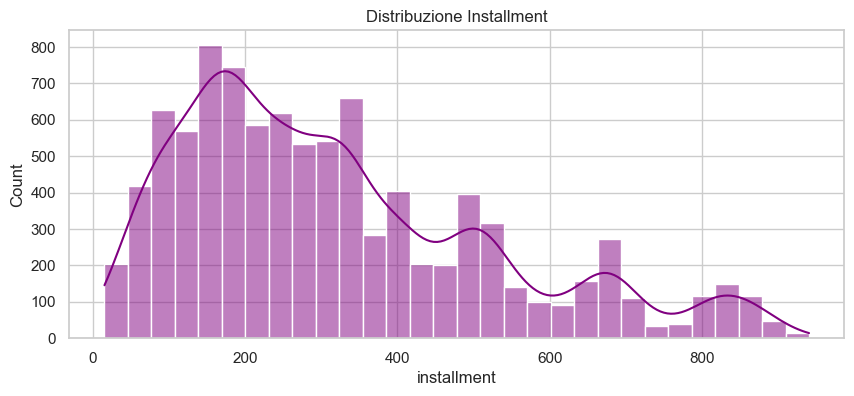

STATISTICHE DESCRITTIVE:

count    9508.000000
mean      320.152235
std       207.083521
min        15.670000
25%       164.020000
50%       269.545000
75%       435.232500
max       940.140000
Name: installment, dtype: float64


In [89]:
plt.figure(figsize=(10,4))
sns.histplot(data['installment'], kde=True, bins = 30, color='purple')
plt.title('Distribuzione Installment')
plt.show()

print('STATISTICHE DESCRITTIVE:\n')
print(data['installment'].describe())

<a id="installment-boxplot"></a>
Osserviamolo con un boxplot

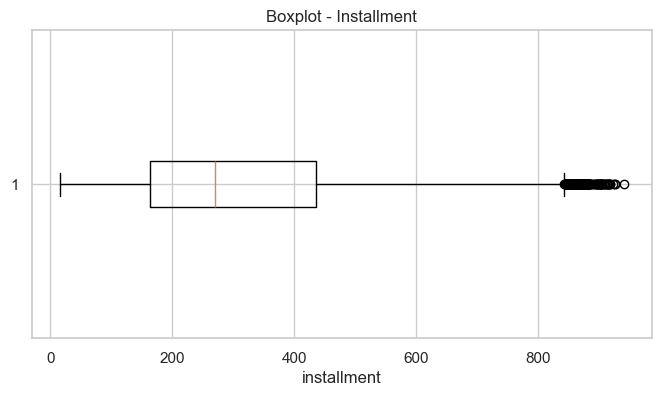

In [90]:
plt.figure(figsize=(8,4))
plt.boxplot(data['installment'], vert=False)
plt.title('Boxplot - Installment')
plt.xlabel('installment')
plt.show()

Calcoliamo gli intervalli


In [91]:
Q1 = data['installment'].quantile(0.25)
Q3 = data['installment'].quantile(0.75)
IQR = Q3 - Q1

lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5* IQR

print(f'Limite Inferiore: {lowerBound:.2f}')
print(f'Limite Superire: {upperBound:.2f}')



Limite Inferiore: -242.80
Limite Superire: 842.05


CALCOLIAMO GLI OUTLIERS 

In [92]:
# Filtrare i lower outliers classici (valori bassi estremi)
lower_outliers = data[data['installment'] < lowerBound]

# Filtrare gli upper outliers
upper_outliers = data[data['installment'] > upperBound]

print("Numero di lower outliers:", len(lower_outliers))
print("Numero di upper outliers:", len(upper_outliers))

Numero di lower outliers: 0
Numero di upper outliers: 193


In [93]:
all_outliers = data[(data['installment'] < lowerBound) | (data['installment'] > upperBound)]

print("Numero totale di outlier :", all_outliers.shape[0])

Numero totale di outlier : 193


In [94]:
all_outliers = data[(data['installment'] < lowerBound) | (data['installment'] > upperBound)]
print("Esempi di outlier:")
print(all_outliers[['installment','dti', 'customer_id']].head())

Esempi di outlier:
     installment    dti  customer_id
237       859.07  20.79        10238
249       842.47  12.81        10250
271       862.97   5.79        10272
275       851.41  19.78        10276
322       876.83  18.08        10323


Come possiamo notare troviamo come outliers anche rate da 842.47 che si discostano poco dal valore max!!
 Definire queste rate outliers non è una buona cosa perchè nella realtà potrebbero anche essere rate di individui che pagano tanto.(vedremo con analisi multivariata)

**CALCOLIAMO SKEWNESS E CURTOSI**

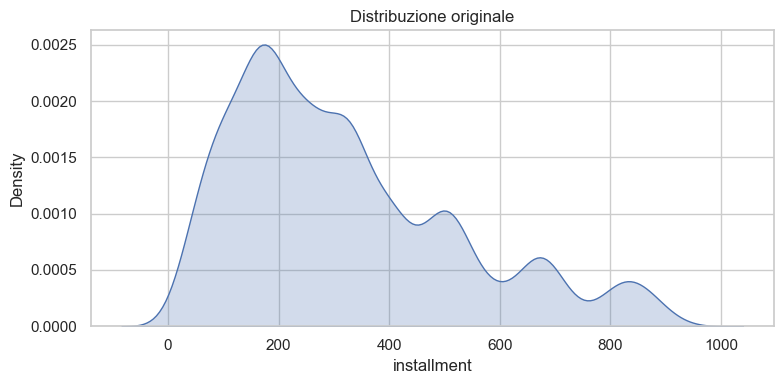


INSTALLMENT
Asimmetria_Skewness: 0.91 | Kurtosis: 0.13


In [95]:
sns.set(style="whitegrid")

skew = data['installment'].skew()
kurt = data['installment'].kurt()


fig, axes = plt.subplots(1, 1, figsize=(8, 4))
sns.kdeplot(data['installment'], ax = axes, fill=True)
axes.set_title('Distribuzione originale')


plt.tight_layout()
plt.show()

for col in ['installment']:
    print(f"\n{col.upper()}")
    print(f"Asimmetria_Skewness: {data[col].skew():.2f} | Kurtosis: {data[col].kurt():.2f}")



Per quanto riguarda l'asimmetria abbiamo una simmetria positiva, ma con una distribuzine sbilanciata verso destra.

Per quanto riguarda Curtosi invece la distribuzione è comunque simile a una normale ma con una tendenza ad avere valori più estremi.

<font size="6">Credit_history_days</font>

Credit_history_days" (giorni di storia creditizia) è una variabile numerica che, in un contesto di analisi del credito o del rischio finanziario, indica la durata totale della storia creditizia di un individuo o di un'entità, misurata in giorni.

Significato: Rappresenta da quanti giorni la persona (o l'entità) ha attivamente utilizzato o avuto accesso a prodotti di credito (come prestiti, carte di credito, mutui, ecc.).

Importanza: Una storia creditizia più lunga è generalmente considerata un fattore positivo, poiché offre ai finanziatori più dati e tempo per valutare l'affidabilità e la coerenza del comportamento di rimborso del debitore.

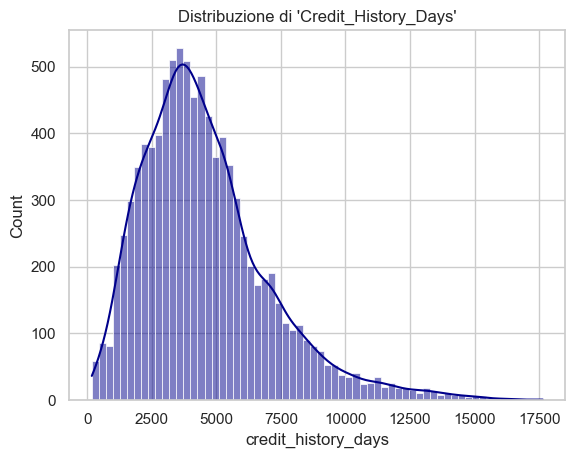

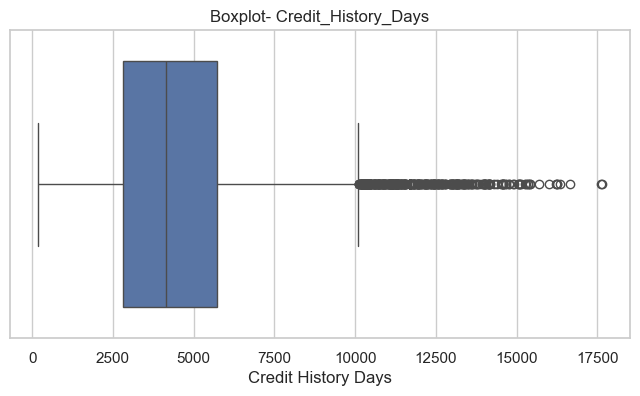

count     9508.000000
mean      4566.344881
std       2498.641022
min        180.041667
25%       2820.000000
50%       4139.958333
75%       5730.041667
max      17639.958330
Name: credit_history_days, dtype: float64

Skewness: 1.1584
Kurtosis: 1.9393


In [96]:
sns.histplot (data = data, x ='credit_history_days', kde = True, color = 'darkblue')
plt.title("Distribuzione di 'Credit_History_Days'")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x = data['credit_history_days'])
plt.title('Boxplot- Credit_History_Days')
plt.xlabel('Credit History Days')
plt.show()

print(data['credit_history_days'].describe())

print(f"\nSkewness: {data['credit_history_days'].skew():.4f}")
print(f"Kurtosis: {data['credit_history_days'].kurt():.4f}")


**Convertiamo da giorni in anni!**

Osservando banche, credit bureau, finanza consumer:

Anni di storia creditizia:

**0–5 anni**:	Molto comune

**5–20 anni**:	Normale

**20–35 anni**:	Comune negli adulti più anziani

**35–45 anni**:	Meno comune ma realistico

**45–55 anni**:	Possibile solo per persone molto anziane (60–75 anni)

**>55 anni**:	Raro → da verificare

**>65 anni**:	Quasi impossibile → probabilmente errore o anomalia

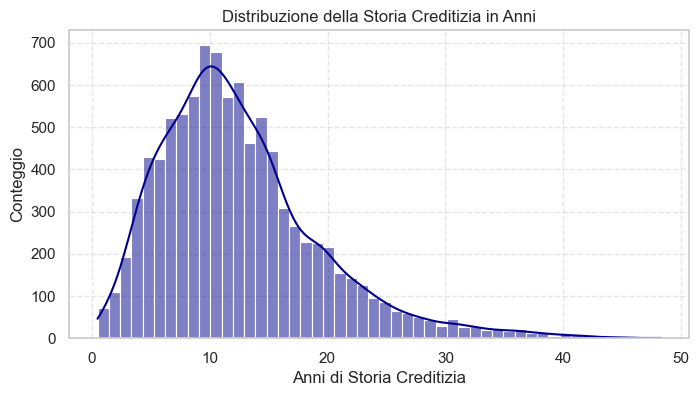

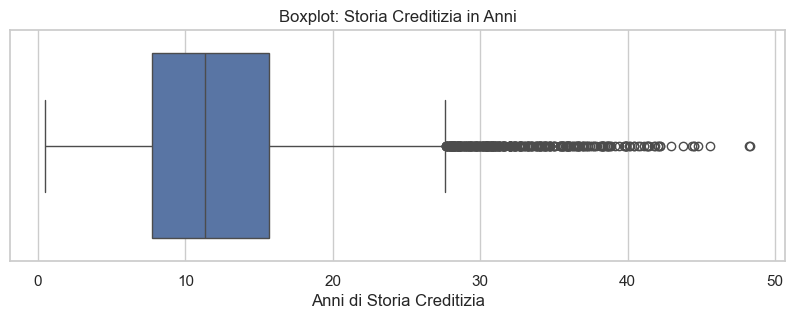

count    9508.000000
mean       12.501971
std         6.840906
min         0.492927
25%         7.720739
50%        11.334588
75%        15.687999
max        48.295574
Name: credit_history_years, dtype: float64

Skewness: 1.1584
Kurtosis: 1.9393


In [97]:
data['credit_history_years'] = data['credit_history_days'] / 365.25

plt.figure(figsize=(8,4))
sns.histplot(data['credit_history_years'], kde=True, bins=50, color = 'darkblue')
plt.title('Distribuzione della Storia Creditizia in Anni')
plt.xlabel('Anni di Storia Creditizia')
plt.ylabel('Conteggio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=data['credit_history_years'])
plt.title('Boxplot: Storia Creditizia in Anni')
plt.xlabel('Anni di Storia Creditizia')
plt.show()

print(data['credit_history_years'].describe())

print(f"\nSkewness: {data['credit_history_days'].skew():.4f}")
print(f"Kurtosis: {data['credit_history_days'].kurt():.4f}")

In [98]:
Q1 = data['credit_history_years'].quantile(0.25)
Q3 = data['credit_history_years'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_chd = Q1 - 1.5 * IQR
upper_bound_chd = Q3 + 1.5 * IQR

print(f'Limite Inferiore: {lower_bound_chd:.4f}')
print(f'Limite Superiore: {upper_bound_chd:.4f}')

Limite Inferiore: -4.2302
Limite Superiore: 27.6389


Calcolando i limiti vediamo che il limite superiore è quasi 28 anni. Se consideriamo i dati reali , vogliamo considerare outliers solo quelli maggiori di 45 anni.

In [99]:
upper_limit = 45
outliers = data[data['credit_history_years'] > upper_limit]
df_clean = data[data['credit_history_years'] <= upper_limit]

print('Numero di outlier sopra i 45 anni:', len(outliers))

Numero di outlier sopra i 45 anni: 3


In [100]:
print('Outliers nel dataset:')
print(outliers['credit_history_years'].head())

Outliers nel dataset:
5801    45.590691
7553    48.229979
8430    48.295574
Name: credit_history_years, dtype: float64


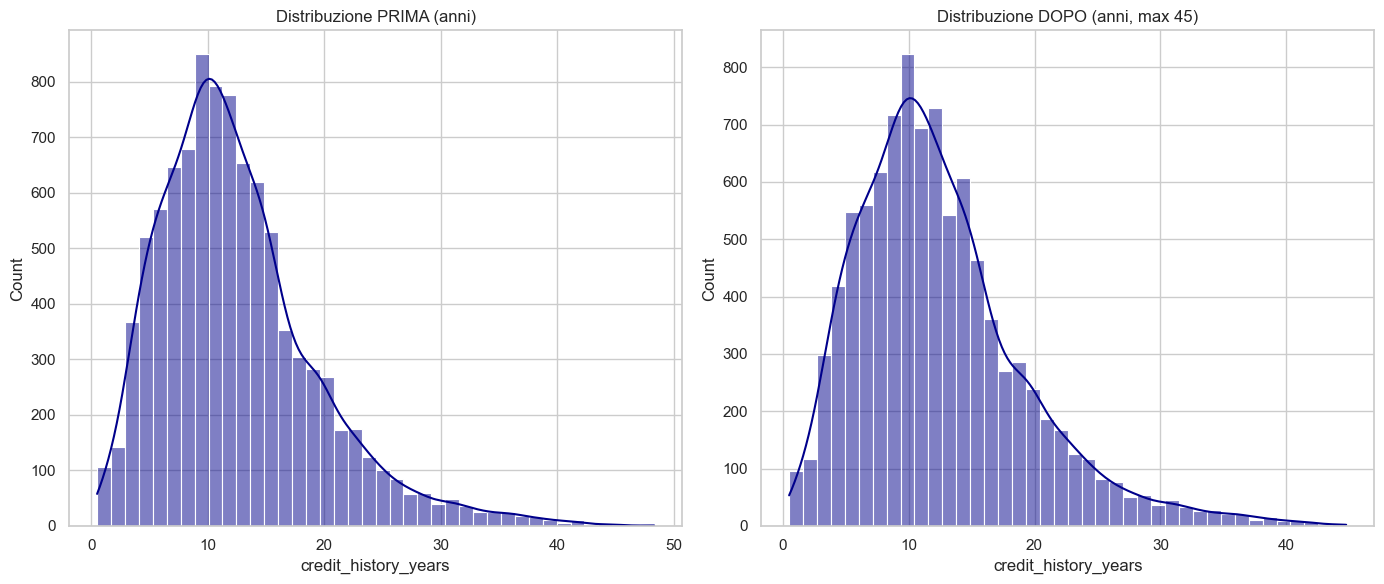

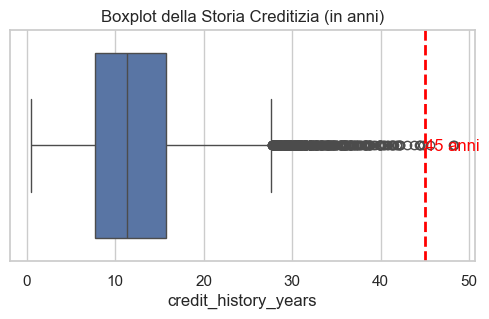

count    9505.000000
mean       12.490965
std         6.813834
min         0.492927
25%         7.720739
50%        11.334588
75%        15.687885
max        44.763860
Name: credit_history_years, dtype: float64

Skewness: 1.1350
Kurtosis: 1.8088


In [101]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data["credit_history_years"], kde=True, bins=40, color = 'darkblue')
plt.title("Distribuzione PRIMA (anni)")
plt.xlabel("credit_history_years")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df_clean["credit_history_years"], kde=True, bins=40, color = 'darkblue')
plt.title("Distribuzione DOPO (anni, max 45)")
plt.xlabel("credit_history_years")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=data["credit_history_years"])
plt.title("Boxplot della Storia Creditizia (in anni)")


plt.axvline(x=45, color='red', linestyle='--', linewidth=2)
plt.text(45, 0.02, "45 anni", color='red')

plt.xlabel("credit_history_years")
plt.show()


print(df_clean['credit_history_years'].describe())

print(f"\nSkewness: {df_clean['credit_history_years'].skew():.4f}")
print(f"Kurtosis: {df_clean['credit_history_years'].kurt():.4f}")

Rispetto a prima non c'è una riduzione massiccia perchè abbiamo tolo solo lo 0.03% e rimuovere solo 3 valori non può cambiare drasticamente la forma della distribuzione ma vabene così perchè nella realtà è normale una coda lunga.

### Statistiche per Categoria

Calcoliamo media, mediana e deviazione standard del FICO Score per ogni categoria.

---
<a id="fico-score"></a>
## Analisi FICO Score

Il FICO Score misura l'affidabilità creditizia di un cliente (range 300-850). In questa sezione rispondiamo alla domanda: **qual è il FICO Score medio dei richiedenti?**

### Categorie FICO Score

Suddividiamo i punteggi in categorie standard per facilitare l'interpretazione:

- **300-579**: Very Poor (Pessimo)
- **580-669**: Fair (Discreto)
- **670-739**: Good (Buono)
- **740-799**: Very Good (Molto Buono)
- **800-850**: Exceptional (Eccellente)

![FICO Score Categories](images/fico_ranges.jpg)

Questa classificazione segue gli standard FICO ufficiali e ci permette di capire la distribuzione qualitativa del rischio nel nostro portafoglio prestiti.

### Distribuzione FICO Score

**Dashboard completa:** istogramma, boxplot e bar chart delle categorie

In [102]:
print("=== STATISTICHE FICO SCORE ===")
print(data['fico_score'].describe())
print(f"\nSkewness: {data['fico_score'].skew():.4f}")
print(f"Kurtosis: {data['fico_score'].kurt():.4f}")

=== STATISTICHE FICO SCORE ===
count    9508.000000
mean      711.155974
std        42.033425
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max      1812.000000
Name: fico_score, dtype: float64

Skewness: 4.8531
Kurtosis: 109.6038


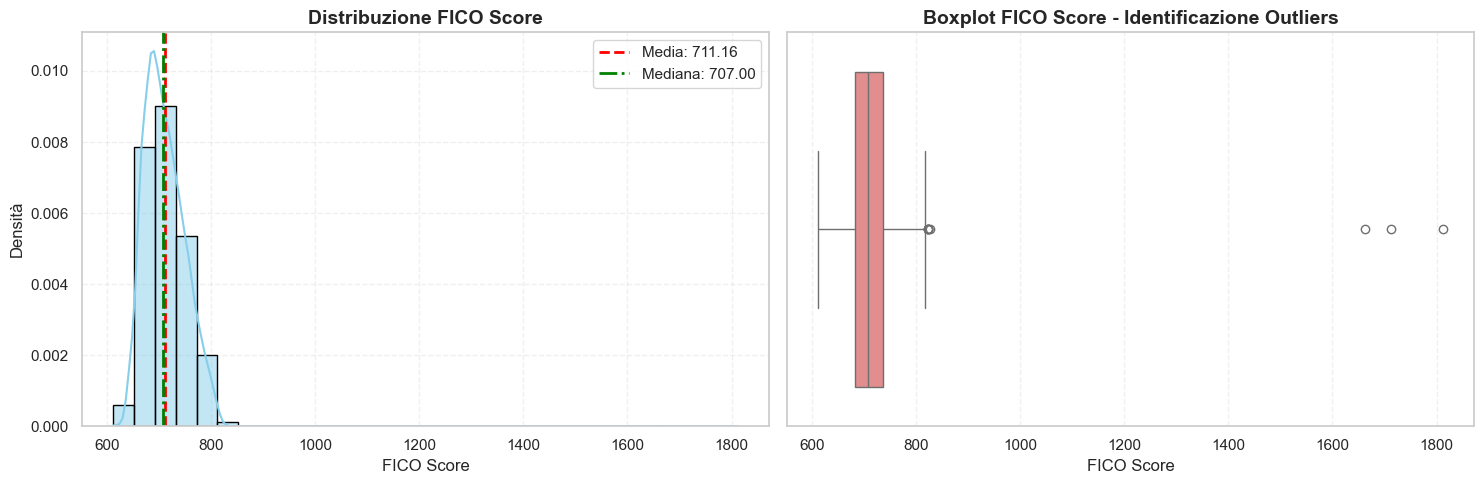

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Istogramma + KDE
ax1 = axes[0]
sns.histplot(data['fico_score'], bins=30, kde=True, color='skyblue', edgecolor='black', ax=ax1, stat='density')
ax1.axvline(data['fico_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data["fico_score"].mean():.2f}')
ax1.axvline(data['fico_score'].median(), color='green', linestyle='-.', linewidth=2, label=f'Mediana: {data["fico_score"].median():.2f}')
ax1.set_title('Distribuzione FICO Score', fontsize=14, fontweight='bold')
ax1.set_xlabel('FICO Score', fontsize=12)
ax1.set_ylabel('Densità', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)

# Boxplot
ax2 = axes[1]
sns.boxplot(x=data['fico_score'], color='lightcoral', ax=ax2)
ax2.set_title('Boxplot FICO Score - Identificazione Outliers', fontsize=14, fontweight='bold')
ax2.set_xlabel('FICO Score', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [104]:
# Identificazione outliers per FICO Score
Q1_fico = data['fico_score'].quantile(0.25)
Q3_fico = data['fico_score'].quantile(0.75)
IQR_fico = Q3_fico - Q1_fico

lower_bound_fico = Q1_fico - 1.5 * IQR_fico
upper_bound_fico = Q3_fico + 1.5 * IQR_fico

print(f'Limite inferiore: {lower_bound_fico:.2f}')
print(f'Limite superiore: {upper_bound_fico:.2f}')

outliers_fico = data[(data['fico_score'] < lower_bound_fico) | (data['fico_score'] > upper_bound_fico)]
print(f'\nNUMERO DI OUTLIERS TROVATI: {outliers_fico.shape[0]}')
print(f'Percentuale di outliers: {(outliers_fico.shape[0] / len(data)) * 100:.2f}%')

Limite inferiore: 599.50
Limite superiore: 819.50

NUMERO DI OUTLIERS TROVATI: 8
Percentuale di outliers: 0.08%


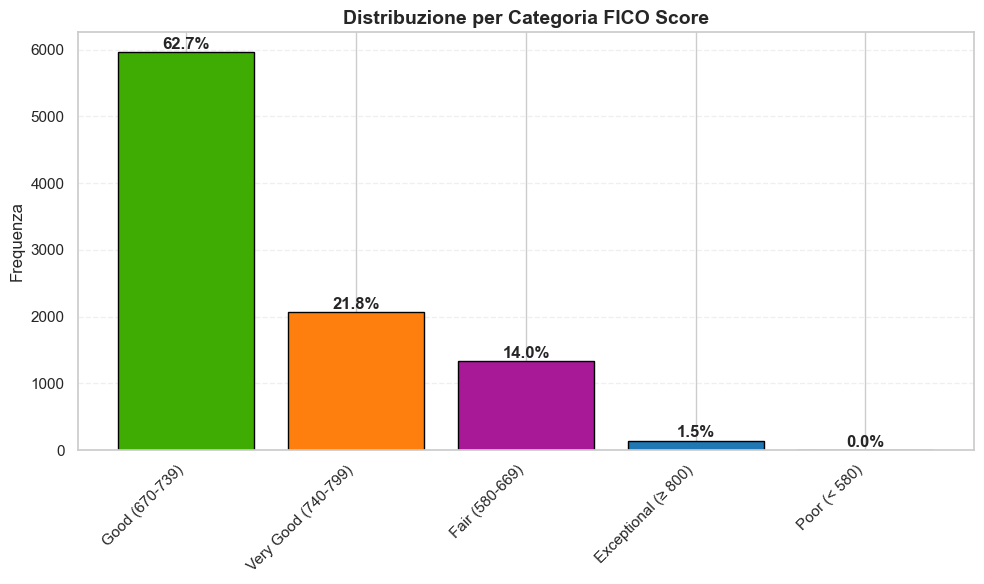


=== DISTRIBUZIONE PER CATEGORIA ===
Good (670-739): 5963 (62.72%)
Very Good (740-799): 2071 (21.78%)
Fair (580-669): 1331 (14.00%)
Exceptional (≥ 800): 143 (1.50%)
Poor (< 580): 0 (0.00%)


In [105]:
def classify_fico(score):
    if score < 580:
        return 'Poor (< 580)'
    elif score < 670:
        return 'Fair (580-669)'
    elif score < 740:
        return 'Good (670-739)'
    elif score < 800:
        return 'Very Good (740-799)'
    else:
        return 'Exceptional (≥ 800)'

data['fico_category'] = data['fico_score'].apply(classify_fico)

category_order = ['Poor (< 580)','Fair (580-669)', 'Good (670-739)', 'Very Good (740-799)', 'Exceptional (≥ 800)']
data['fico_category'] = pd.Categorical(data['fico_category'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))

fico_counts = data['fico_category'].value_counts()  
colors = ['#3fac03', '#ff7f0e', "#a81997", '#1f77b4', '#9467bd']
plt.bar(range(len(fico_counts)), fico_counts.values, color=colors, edgecolor='black')
plt.xticks(range(len(fico_counts)), fico_counts.index, rotation=45, ha='right')
plt.title('Distribuzione per Categoria FICO Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequenza', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Percentuali
for i, (cat, count) in enumerate(fico_counts.items()):
    pct = (count / len(data)) * 100
    plt.text(i, count + 50, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== DISTRIBUZIONE PER CATEGORIA ===")
for cat, count in fico_counts.items():
    print(f"{cat}: {count} ({(count/len(data))*100:.2f}%)")

---
<a id="purpose-analisi"></a>
## Analisi Purpose 

**Quali sono gli scopi più comuni per cui le persone richiedono prestiti?**


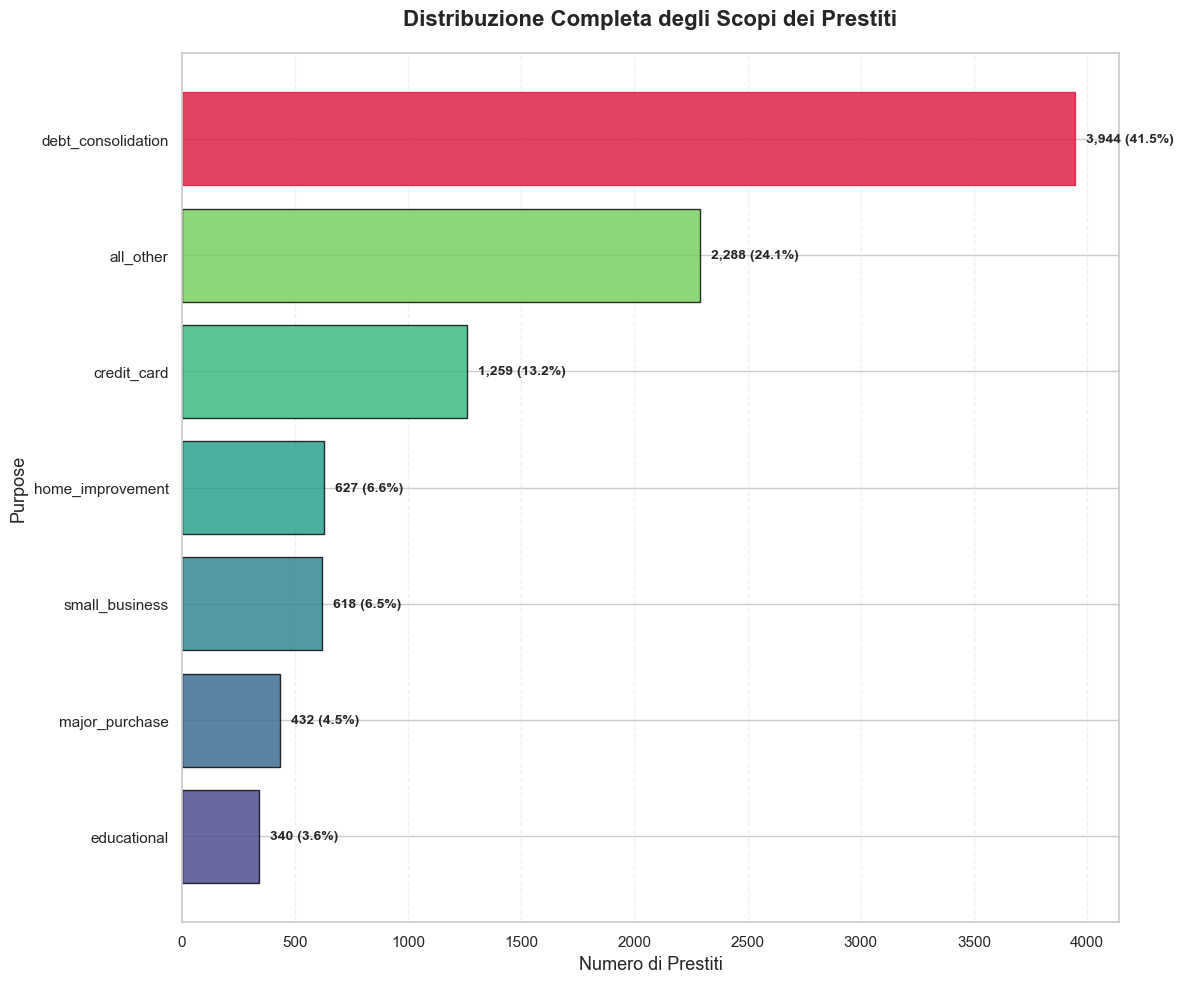


                    STATISTICHE PURPOSE
Purpose                               Count      Percentage
----------------------------------------------------------------------
debt_consolidation                    3,944          41.48%
all_other                             2,288          24.06%
credit_card                           1,259          13.24%
home_improvement                        627           6.59%
small_business                          618           6.50%
major_purchase                          432           4.54%
educational                             340           3.58%
TOTALE                                9,508         100.00%

Numero totale di categorie:         7
Categoria più frequente:            debt_consolidation (3,944 prestiti)
Categoria meno frequente:           educational (340 prestiti)


In [106]:

purpose_counts = data['purpose'].value_counts()
purpose_pct = (purpose_counts / len(data) * 100)

purpose_counts_sorted = purpose_counts.sort_values()

fig, ax = plt.subplots(figsize=(12, 10))

colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.9, len(purpose_counts_sorted)))

bars = ax.barh(range(len(purpose_counts_sorted)), 
               purpose_counts_sorted.values, 
               color=colors_gradient, 
               edgecolor='black',
               alpha=0.8)

# Colora in rosso la barra più alta
max_idx = np.argmax(purpose_counts_sorted.values)
bars[max_idx].set_color('crimson')

# Aggiungi le percentuali alla fine di ogni barra
for i, (purpose, count) in enumerate(purpose_counts_sorted.items()):
    pct = (count / len(data)) * 100
    ax.text(count + 50, i, f'{count:,} ({pct:.1f}%)', 
            va='center', fontweight='bold', fontsize=10)

# Imposta le etichette sull'asse Y
ax.set_yticks(range(len(purpose_counts_sorted)))
ax.set_yticklabels(purpose_counts_sorted.index, fontsize=11)

ax.set_title('Distribuzione Completa degli Scopi dei Prestiti', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Numero di Prestiti', fontsize=13)
ax.set_ylabel('Purpose', fontsize=13)

ax.grid(True, linestyle='--', alpha=0.3, axis='x')


plt.tight_layout()
plt.show()

print("\n" + "="*70)
print(" "*20 + "STATISTICHE PURPOSE")
print("="*70)
print(f"{'Purpose':<30} {'Count':>12} {'Percentage':>15}")
print("-"*70)
for purpose, count in purpose_counts.items():
    pct = (count / len(data)) * 100
    print(f"{purpose:<30} {count:>12,} {pct:>14.2f}%")
print("="*70)
print(f"{'TOTALE':<30} {len(data):>12,} {100.0:>14.2f}%")
print("="*70)

# Statistiche aggiuntive
print(f"\n{'Numero totale di categorie:':<35} {len(purpose_counts)}")
print(f"{'Categoria più frequente:':<35} {purpose_counts.index[0]} ({purpose_counts.iloc[0]:,} prestiti)")
print(f"{'Categoria meno frequente:':<35} {purpose_counts.index[-1]} ({purpose_counts.iloc[-1]:,} prestiti)")

---
<a id="annual-income"></a>
# Analizziamo il profilo generale dei redditi dei clienti, DA CONTINUARE

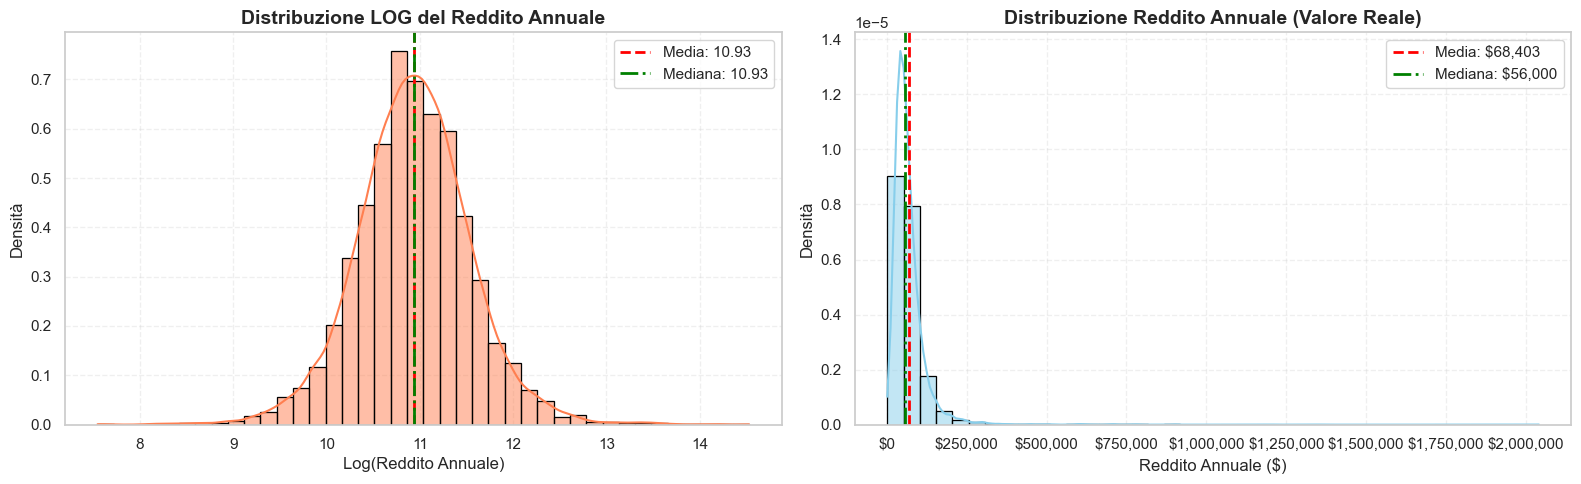


Skewness (Log): 0.0636
Skewness (Reale): 9.6762
min 1896.0000003508226
max 2039784.004362027
mean 68402.9707496203
std 61126.934674854514


In [107]:

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
data['annual_income'] = np.exp(data['log_annual_income'])

ax1 = axes[0]
sns.histplot(data['log_annual_income'], bins=40, kde=True, color='coral', edgecolor='black', ax=ax1, stat='density')
ax1.axvline(data['log_annual_income'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {data["log_annual_income"].mean():.2f}')
ax1.axvline(data['log_annual_income'].median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Mediana: {data["log_annual_income"].median():.2f}')
ax1.set_title('Distribuzione LOG del Reddito Annuale', fontsize=14, fontweight='bold')
ax1.set_xlabel('Log(Reddito Annuale)', fontsize=12)
ax1.set_ylabel('Densità', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)


ax2 = axes[1]
sns.histplot(data['annual_income'], bins=40, kde=True, color='skyblue', edgecolor='black', ax=ax2, stat='density')
ax2.axvline(data['annual_income'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: ${data["annual_income"].mean():,.0f}')
ax2.axvline(data['annual_income'].median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Mediana: ${data["annual_income"].median():,.0f}')
ax2.set_title('Distribuzione Reddito Annuale (Valore Reale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Reddito Annuale ($)', fontsize=12)
ax2.set_ylabel('Densità', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.3)


ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\nSkewness (Log): {data['log_annual_income'].skew():.4f}")
print(f"Skewness (Reale): {data['annual_income'].skew():.4f}")

data['annual_income'].describe()
print("min", data['annual_income'].min())
print("max", data['annual_income'].max())
print("mean", data['annual_income'].mean())
print("std", data['annual_income'].std())

<a id="dti-analisi"></a>
# Analisi Completa della  DTI 

## Cos'è il DTI?

Il **Debt-to-Income Ratio (DTI)** è un indicatore fondamentale nel settore del credito che misura il rapporto tra i debiti mensili totali di un individuo e il suo reddito mensile lordo.

### Formula:
$$\text{DTI} = \frac{\text{Pagamenti Debiti Mensili Totali}}{\text{Reddito Mensile Lordo}} \times 100$$


Un DTI elevato indica che una persona sta già utilizzando gran parte del proprio reddito per pagare debiti esistenti, riducendo la capacità di onorare nuovi prestiti.

##  Statistiche Descrittive DTI

In [108]:
data_clean_dti = data[(data['dti'] >= lower_bound) & (data['dti'] <= upper_bound)]

print("="*60)
print("CONFRONTO STATISTICHE DTI")
print("="*60)

stats_comparison = pd.DataFrame({
    'Metrica': ['Count', 'Media', 'Mediana', 'Dev. Std', 'Min', 'Q1', 'Q3', 'Max', 'Skewness', 'Kurtosis'],
    'Con Outliers': [
        len(data),
        data['dti'].mean(),
        data['dti'].median(),
        data['dti'].std(),
        data['dti'].min(),
        data['dti'].quantile(0.25),
        data['dti'].quantile(0.75),
        data['dti'].max(),
        data['dti'].skew(),
        data['dti'].kurtosis()
    ],
    'Senza Outliers': [
        len(data_clean_dti),
        data_clean_dti['dti'].mean(),
        data_clean_dti['dti'].median(),
        data_clean_dti['dti'].std(),
        data_clean_dti['dti'].min(),
        data_clean_dti['dti'].quantile(0.25),
        data_clean_dti['dti'].quantile(0.75),
        data_clean_dti['dti'].max(),
        data_clean_dti['dti'].skew(),
        data_clean_dti['dti'].kurtosis()
    ]
})

stats_comparison['Variazione (%)'] = ((stats_comparison['Senza Outliers'] - stats_comparison['Con Outliers']) / 
                                       stats_comparison['Con Outliers'] * 100).round(2)

print("\n" + stats_comparison.to_string(index=False))
print("\n" + "="*60)

CONFRONTO STATISTICHE DTI

 Metrica  Con Outliers  Senza Outliers  Variazione (%)
   Count   9508.000000       29.000000          -99.69
   Media     12.630247        0.127931          -98.99
 Mediana     12.700000        0.130000          -98.98
Dev. Std      6.886784        0.038949          -99.43
     Min      0.000000        0.050000             inf
      Q1      7.227500        0.090000          -98.75
      Q3     18.000000        0.160000          -99.11
     Max     29.960000        0.180000          -99.40
Skewness      0.020708       -0.338964        -1736.87
Kurtosis     -0.902021       -0.916871            1.65



## Distribuzione del DTI

/var/folders/vv/k2c7_h_s24d_cn79nfg65px00000gn/T/ipykernel_15319/2581572495.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['DTI'])


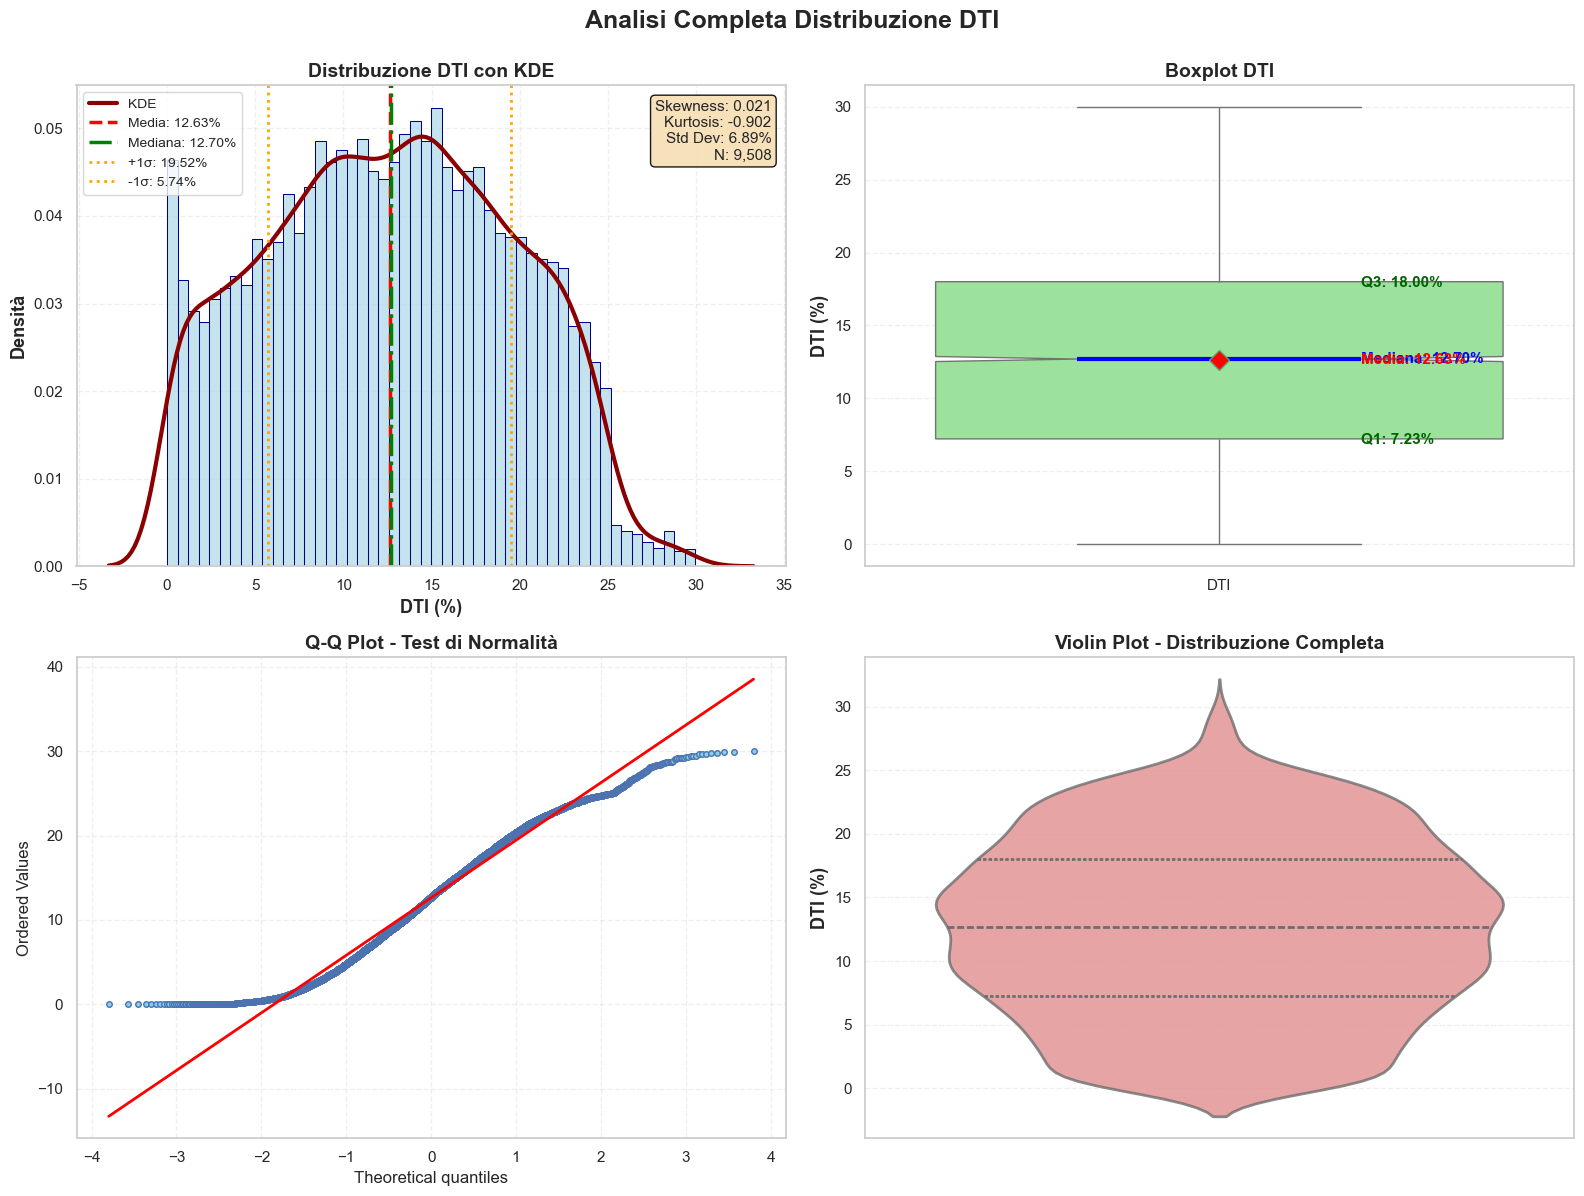

                    STATISTICHE DESCRITTIVE DTI
Media:              12.63%
Mediana:            12.70%
Dev. Standard:      6.89%
Skewness:           0.021
Kurtosis:           -0.902
DTI = 0:            87 (0.9150%)


In [109]:

from scipy import stats as sp_stats

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisi Completa Distribuzione DTI', fontsize=18, fontweight='bold', y=0.995)

vals_dti = data['dti'].dropna()
mean_dti = vals_dti.mean()
median_dti = vals_dti.median()
std_dti = vals_dti.std()
skew_dti = vals_dti.skew()
kurt_dti = vals_dti.kurtosis()

sns.histplot(vals_dti, bins=50, color='lightblue', edgecolor='darkblue', 
             alpha=0.7, stat='density', kde=False, ax=axes[0, 0])
sns.kdeplot(vals_dti, color='darkred', linewidth=3, ax=axes[0, 0], label='KDE')

axes[0, 0].axvline(mean_dti, color='red', linestyle='--', linewidth=2.5, label=f'Media: {mean_dti:.2f}%')
axes[0, 0].axvline(median_dti, color='green', linestyle='-.', linewidth=2.5, label=f'Mediana: {median_dti:.2f}%')
axes[0, 0].axvline(mean_dti + std_dti, color='orange', linestyle=':', linewidth=2, label=f'+1σ: {(mean_dti + std_dti):.2f}%')
axes[0, 0].axvline(mean_dti - std_dti, color='orange', linestyle=':', linewidth=2, label=f'-1σ: {(mean_dti - std_dti):.2f}%')

textstr = f'Skewness: {skew_dti:.3f}\nKurtosis: {kurt_dti:.3f}\nStd Dev: {std_dti:.2f}%\nN: {len(vals_dti):,}'
axes[0, 0].text(0.98, 0.97, textstr, transform=axes[0, 0].transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9, edgecolor='black'))

axes[0, 0].set_xlabel('DTI (%)', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Densità', fontsize=13, fontweight='bold')
axes[0, 0].set_title('Distribuzione DTI con KDE', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10, loc='upper left')
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# --- SUBPLOT 2: BOXPLOT ---
bp = sns.boxplot(y=vals_dti, color='lightgreen', ax=axes[0, 1], 
                 notch=True, showmeans=True, showcaps=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=10),
                 medianprops=dict(color='blue', linewidth=3))

q1_dti = vals_dti.quantile(0.25)
q3_dti = vals_dti.quantile(0.75)

axes[0, 1].text(0.2, q1_dti, f'Q1: {q1_dti:.2f}%', fontsize=11, va='center', fontweight='bold', color='darkgreen')
axes[0, 1].text(0.2, median_dti, f'Mediana: {median_dti:.2f}%', fontsize=11, va='center', fontweight='bold', color='blue')
axes[0, 1].text(0.2, q3_dti, f'Q3: {q3_dti:.2f}%', fontsize=11, va='center', fontweight='bold', color='darkgreen')
axes[0, 1].text(0.2, mean_dti, f'Media: {mean_dti:.2f}%', fontsize=11, va='center', fontweight='bold', color='red')

axes[0, 1].set_ylabel('DTI (%)', fontsize=13, fontweight='bold')
axes[0, 1].set_title('Boxplot DTI', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(['DTI'])
axes[0, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

# --- SUBPLOT 3: Q-Q PLOT ---
sp_stats.probplot(vals_dti, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Test di Normalità', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, linestyle='--')
axes[1, 0].get_lines()[0].set_markerfacecolor('skyblue')
axes[1, 0].get_lines()[0].set_markersize(4)
axes[1, 0].get_lines()[1].set_color('red')
axes[1, 0].get_lines()[1].set_linewidth(2)

sns.violinplot(y=vals_dti, color='lightcoral', ax=axes[1, 1], 
               inner='quartile', alpha=0.8, linewidth=2)

axes[1, 1].set_ylabel('DTI (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_title('Violin Plot - Distribuzione Completa', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("="*70)
print(" "*20 + "STATISTICHE DESCRITTIVE DTI")
print("="*70)
print(f"Media:              {mean_dti:.2f}%")
print(f"Mediana:            {median_dti:.2f}%")
print(f"Dev. Standard:      {std_dti:.2f}%")
print(f"Skewness:           {skew_dti:.3f}")
print(f"Kurtosis:           {kurt_dti:.3f}")
print(f"DTI = 0:            {len(data[data['dti'] == 0])} ({(len(data[data['dti'] == 0]) / len(data)) * 100:.4f}%)")
print("="*70)

CONFRONTIAMO IL NUMERO DI PERSONE CHE HANNO DTI = 0, SE QUESTI HANNO UNA PERCENTUALE ALTA, ALLORA E' SOSPETTO

In [110]:
print(f"Clienti con DTI = 0: {len(data[data['dti'] == 0])}")
print(f"Percentuale: {(len(data[data['dti'] == 0]) / len(data)) * 100:.2f}%")



Clienti con DTI = 0: 87
Percentuale: 0.92%


# ANALISI MULTIVARIATA

Esploriamo ora le relazioni tra variabili usando i metodi di analisi dell'associazione. Studieremo tre variabili chiave: DTI (debt-to-income ratio), Interest Rate (tasso di interesse) e FICO Score (punteggio creditizio).

Obiettivo: capire come queste variabili si correlano tra loro e con altre caratteristiche dei prestiti. Useremo Pearson correlation, covariance, scatter plots, correlation matrices e distribuzioni condizionate per confrontare gruppi.

---
## 1. ANALISI DTI (Debt-to-Income Ratio)

### 1.1 Associazione DTI con altre variabili

studiamo la correlazione tra dti e le principali variabili del dataset usando pearson e covarianza

In [111]:
dti_vars = ['revolving_util', 'fico_score', 'revolving_balance', 'credit_history_days', 
            'log_annual_income', 'not_fully_paid', 'interest_rate']

print("╔" + "="*78 + "╗")
print("║" + " ASSOCIAZIONE DTI CON ALTRE VARIABILI".center(78) + "║")
print("╠" + "="*78 + "╣")
print(f"║ {'Variabile':<30} {'Pearson ρ':>20} {'Covariance':>20} ║")
print("╠" + "="*78 + "╣")

dti_correlations = {}
dti_covariances = {}
for var in dti_vars:
    dti_correlations[var] = data['dti'].corr(data[var])
    dti_covariances[var] = data['dti'].cov(data[var])
    print(f"║ {var:<30} {dti_correlations[var]:>20.4f} {dti_covariances[var]:>20.2f} ║")

print("╚" + "="*78 + "╝")

sorted_corr = sorted(dti_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\nTop 3 correlazioni con DTI:")
for i, (var, corr) in enumerate(sorted_corr[:3], 1):
    direction = "positiva" if corr > 0 else "negativa"
    print(f"   {i}. {var}: ρ = {corr:.4f} (correlazione {direction})")

╔==============================================================================╗
║                     ASSOCIAZIONE DTI CON ALTRE VARIABILI                     ║
╠==============================================================================╣
║ Variabile                                 Pearson ρ           Covariance ║
╠==============================================================================╣
║ revolving_util                               0.3275                67.02 ║
║ fico_score                                  -0.2224               -64.37 ║
║ revolving_balance                            0.1893             43969.70 ║
║ credit_history_days                          0.0600              1033.31 ║
║ log_annual_income                           -0.0537                -0.23 ║
║ not_fully_paid                               0.0381                 0.10 ║
║ interest_rate                                0.0296                 0.04 ║
╚===========================================================

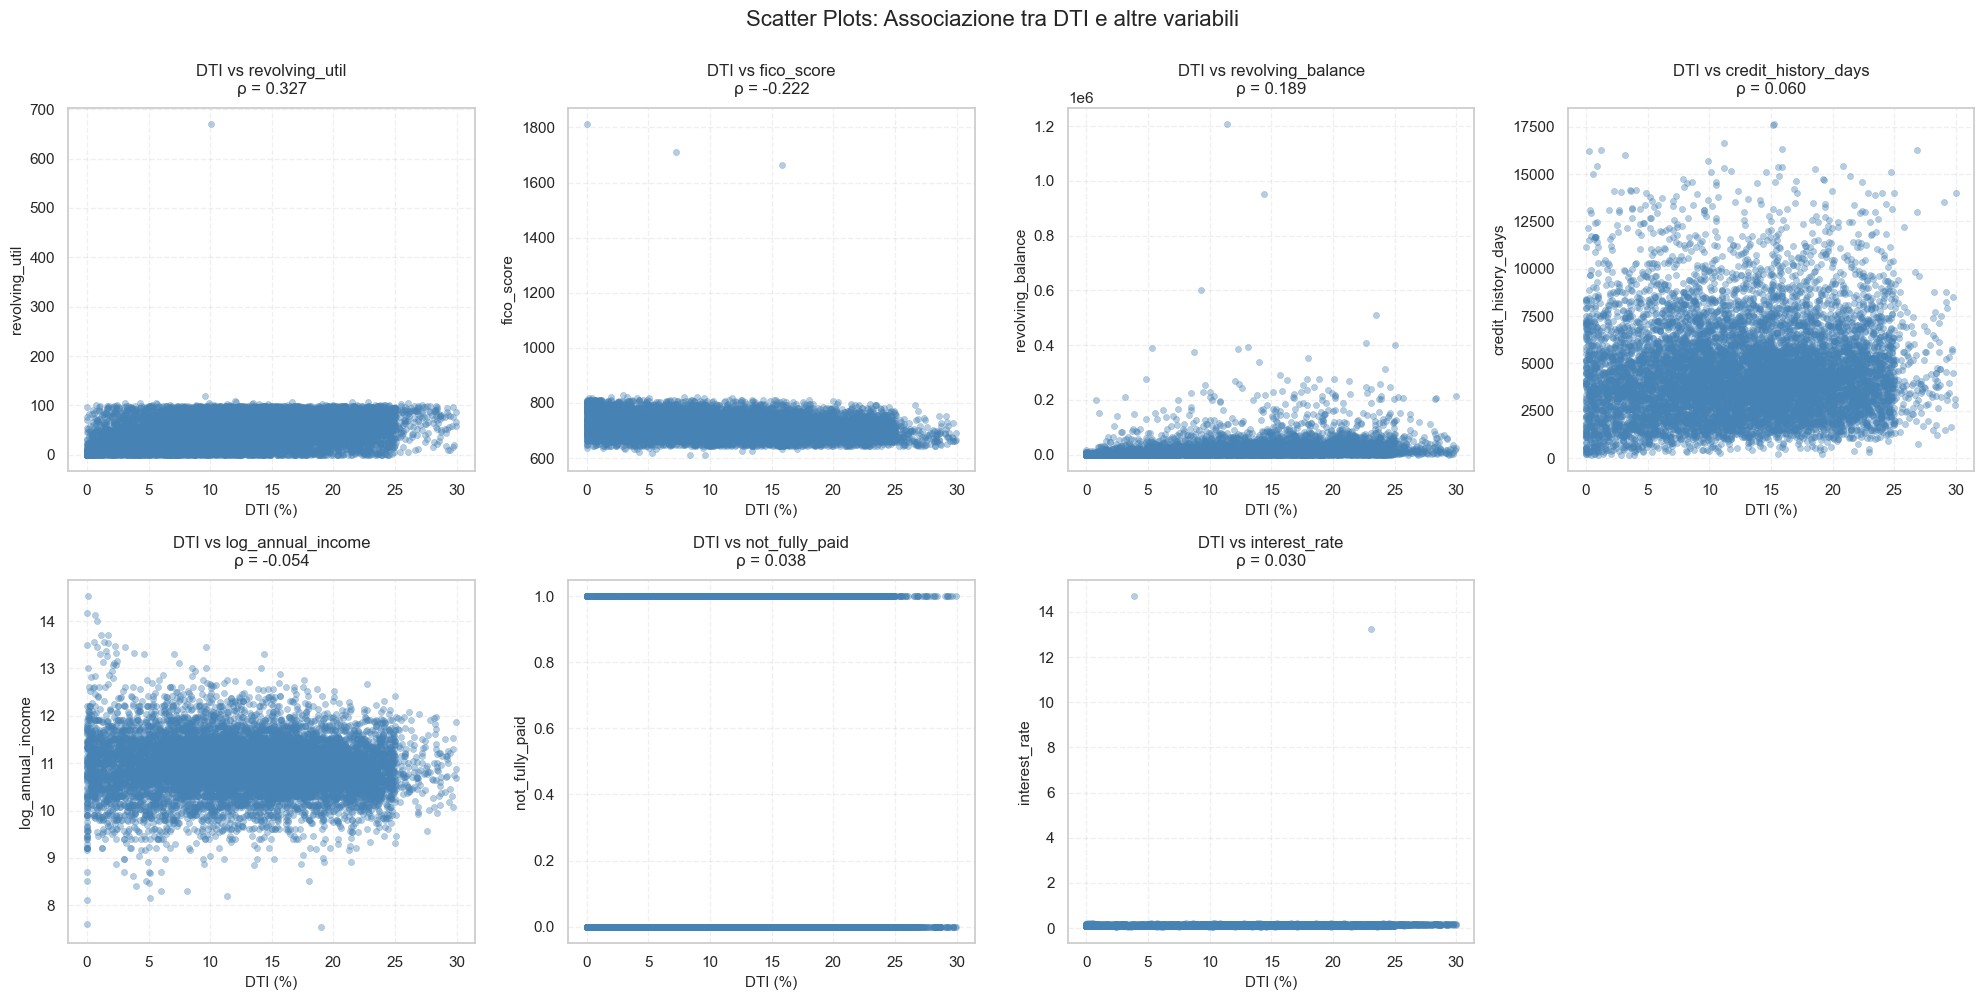

In [112]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, var in enumerate(dti_vars):
    sns.scatterplot(data=data, x='dti', y=var, alpha=0.4, s=20, 
                   color='steelblue', edgecolor=None, ax=axes[idx])
    
    axes[idx].set_xlabel('DTI (%)', fontsize=11)
    axes[idx].set_ylabel(var, fontsize=11)
    axes[idx].set_title(f'DTI vs {var}\nρ = {dti_correlations[var]:.3f}', 
                       fontsize=12, pad=10)
    axes[idx].grid(True, alpha=0.3, linestyle='--')

axes[7].axis('off')

plt.suptitle('Scatter Plots: Associazione tra DTI e altre variabili', 
             fontsize=16, y=0.998)
plt.tight_layout()
plt.show()

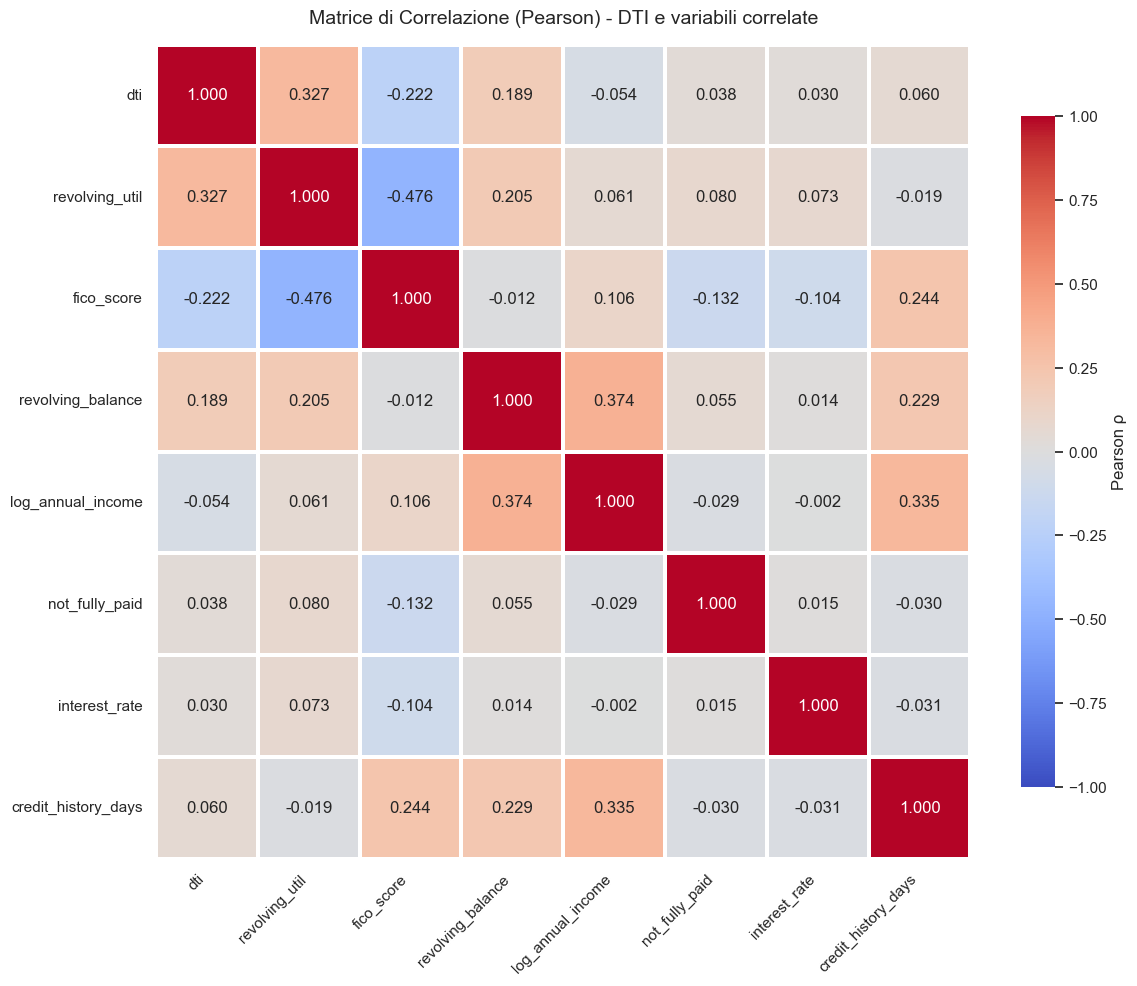

In [113]:
correlation_vars_dti = ['dti', 'revolving_util', 'fico_score', 'revolving_balance', 
                        'log_annual_income', 'not_fully_paid', 'interest_rate', 'credit_history_days']

corr_matrix_dti = data[correlation_vars_dti].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix_dti, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8, "label": "Pearson ρ"},
            vmin=-1, vmax=1, ax=ax)
plt.title('Matrice di Correlazione (Pearson) - DTI e variabili correlate', 
          fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.2 Distribuzioni Condizionate del DTI

confrontiamo la distribuzione del dti per diversi gruppi condizionati su altre variabili categoriche

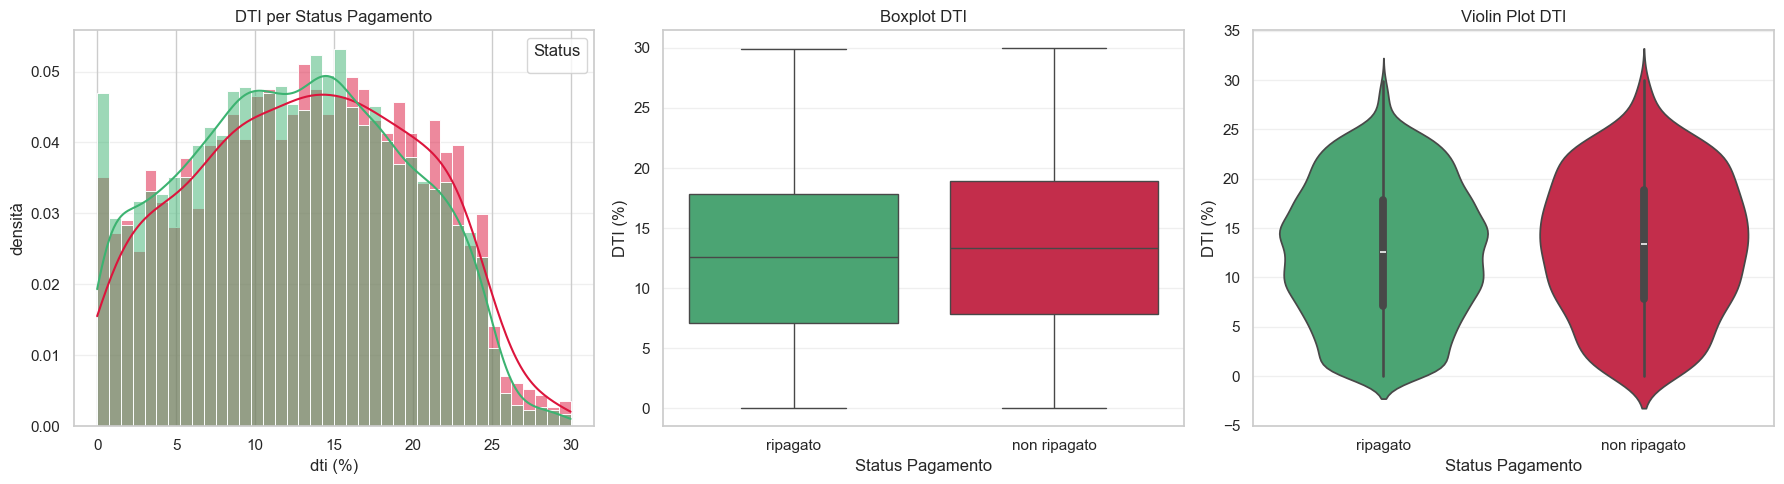


Statistiche DTI per Status Pagamento:

ripagato:
  media: 12.52%
  mediana: 12.58%
  std: 6.86%
  q1-q3: [7.13%, 17.82%]

non ripagato:
  media: 13.23%
  mediana: 13.38%
  std: 7.02%
  q1-q3: [7.83%, 18.90%]


In [114]:
data['not_fully_paid'] = data['not_fully_paid'].astype(str)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=data, x='dti', hue='not_fully_paid', bins=40, kde=True, 
             palette={'0': 'mediumseagreen', '1': 'crimson'}, alpha=0.5, 
             ax=axes[0], stat='density', common_norm=False)
axes[0].set_xlabel('dti (%)')
axes[0].set_ylabel('densità')
axes[0].set_title('DTI per Status Pagamento')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['ripagato', 'non ripagato'], title='Status')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(data=data, x='not_fully_paid', y='dti', 
            palette={'0': 'mediumseagreen', '1': 'crimson'}, ax=axes[1], 
            hue='not_fully_paid', legend=False)
axes[1].set_xlabel('Status Pagamento')
axes[1].set_ylabel('DTI (%)')
axes[1].set_title('Boxplot DTI')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['ripagato', 'non ripagato'])
axes[1].grid(True, alpha=0.3, axis='y')

sns.violinplot(data=data, x='not_fully_paid', y='dti', 
               palette={'0': 'mediumseagreen', '1': 'crimson'}, ax=axes[2], 
               hue='not_fully_paid', legend=False)
axes[2].set_xlabel('Status Pagamento')
axes[2].set_ylabel('DTI (%)')
axes[2].set_title('Violin Plot DTI')
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(['ripagato', 'non ripagato'])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nStatistiche DTI per Status Pagamento:")
print("="*50)

for status in ['0', '1']:
    dti_group = data[data['not_fully_paid'] == status]['dti']
    status_name = "ripagato" if status == '0' else "non ripagato"
    print(f"\n{status_name}:")
    print(f"  media: {dti_group.mean():.2f}%")
    print(f"  mediana: {dti_group.median():.2f}%")
    print(f"  std: {dti_group.std():.2f}%")
    print(f"  q1-q3: [{dti_group.quantile(0.25):.2f}%, {dti_group.quantile(0.75):.2f}%]")

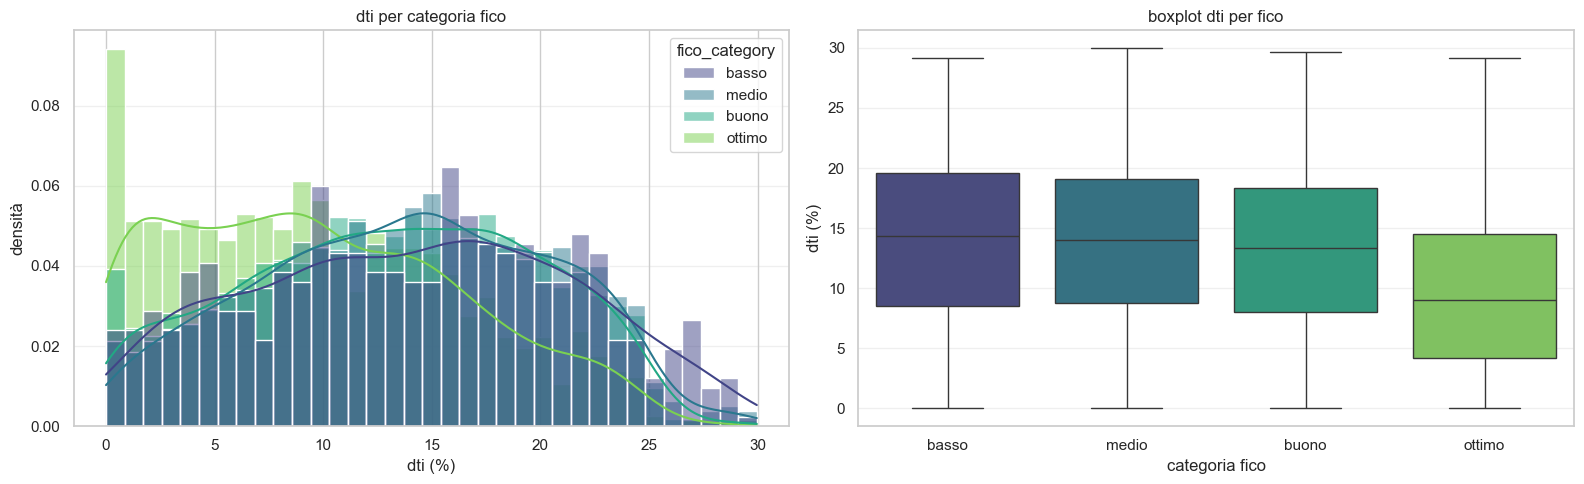

Statistiche dti per categoria fico:

fico basso:
  media: 14.00%
  mediana: 14.34%
  count: 487 prestiti (5.1%)

fico medio:
  media: 13.79%
  mediana: 14.00%
  count: 3702 prestiti (38.9%)

fico buono:
  media: 13.11%
  mediana: 13.38%
  count: 3105 prestiti (32.7%)

fico ottimo:
  media: 9.72%
  mediana: 9.03%
  count: 2211 prestiti (23.3%)


In [115]:
data['fico_category'] = pd.cut(
    data['fico_score'], 
    bins=[600, 660, 700, 740, 850], 
    labels=['basso', 'medio', 'buono', 'ottimo']
)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(
    data=data,
    x='dti',
    hue='fico_category',
    bins=35,
    kde=True,
    palette='viridis',
    alpha=0.5,
    ax=axes[0],
    stat='density',
    common_norm=False
)
axes[0].set_xlabel('dti (%)')
axes[0].set_ylabel('densità')
axes[0].set_title('dti per categoria fico')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(
    data=data,
    x='fico_category',
    y='dti',
    hue='fico_category',  
    legend=False,         
    palette='viridis',
    ax=axes[1]
)
axes[1].set_xlabel('categoria fico')
axes[1].set_ylabel('dti (%)')
axes[1].set_title('boxplot dti per fico')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Statistiche dti per categoria fico:")
print("="*50)
for category in ['basso', 'medio', 'buono', 'ottimo']:
    dti_cat = data[data['fico_category'] == category]['dti'].dropna()
    print(f"\nfico {category}:")
    print(f"  media: {dti_cat.mean():.2f}%")
    print(f"  mediana: {dti_cat.median():.2f}%")
    print(f"  count: {len(dti_cat)} prestiti ({len(dti_cat)/len(data)*100:.1f}%)")


---
## 2. ANALISI INTEREST RATE 

### 2.1 Associazione Interest Rate con altre variabili

analizziamo quali fattori sono correlati con il tasso di interesse applicato ai prestiti

In [116]:
interest_vars = ['fico_score', 'dti', 'log_annual_income', 'revolving_util', 
                'credit_history_days', 'revolving_balance', 'installment', 'not_fully_paid']

print("associazione interest rate con altre variabili")
print("="*70)
print(f"{'variabile':<30} {'pearson ρ':>18} {'covariance':>18}")
print("-"*70)

interest_correlations = {}
interest_covariances = {}
for var in interest_vars:
    interest_correlations[var] = data_clean['interest_rate'].corr(data[var])
    interest_covariances[var] = data_clean['interest_rate'].cov(data[var])
    print(f"{var:<30} {interest_correlations[var]:>18.4f} {interest_covariances[var]:>18.2f}")

print("="*70)

sorted_corr_int = sorted(interest_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\ntop 3 correlazioni con interest rate:")
for i, (var, corr) in enumerate(sorted_corr_int[:3], 1):
    direction = "positiva" if corr > 0 else "negativa"
    print(f"  {i}. {var}: ρ = {corr:.4f} (correlazione {direction})")

associazione interest rate con altre variabili
variabile                               pearson ρ         covariance
----------------------------------------------------------------------
fico_score                                -0.6533              -0.72
dti                                        0.2273               0.04
log_annual_income                          0.0512               0.00
revolving_util                             0.4619               0.36
credit_history_days                       -0.1245              -8.15
revolving_balance                          0.0847              71.35
installment                                0.2712               1.46
not_fully_paid                             0.1572               0.00

top 3 correlazioni con interest rate:
  1. fico_score: ρ = -0.6533 (correlazione negativa)
  2. revolving_util: ρ = 0.4619 (correlazione positiva)
  3. installment: ρ = 0.2712 (correlazione positiva)


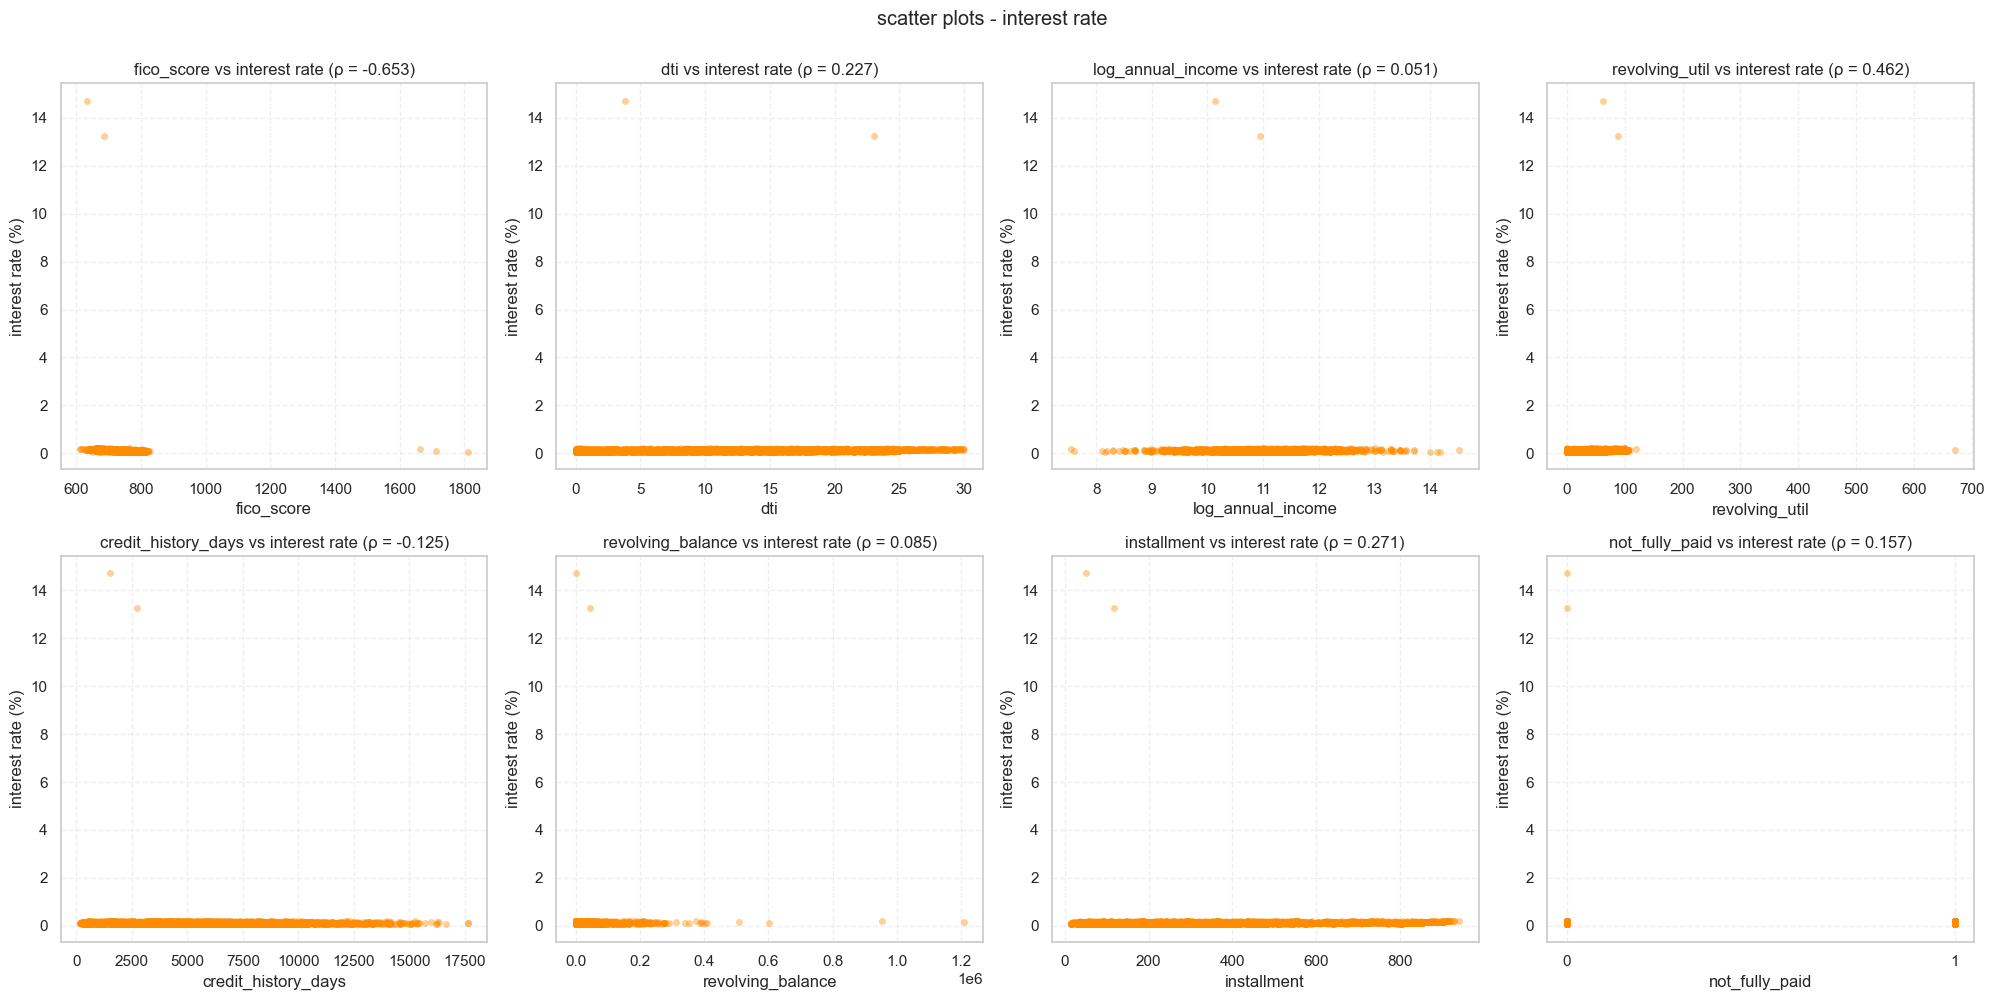

In [117]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, var in enumerate(interest_vars):
    sns.scatterplot(data=data, x=var, y='interest_rate', alpha=0.4, s=20, 
                   color='darkorange', edgecolor=None, ax=axes[idx])
    
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('interest rate (%)')
    axes[idx].set_title(f'{var} vs interest rate (ρ = {interest_correlations[var]:.3f})')
    axes[idx].grid(True, alpha=0.3, linestyle='--')

plt.suptitle('scatter plots - interest rate', y=0.998)
plt.tight_layout()
plt.show()

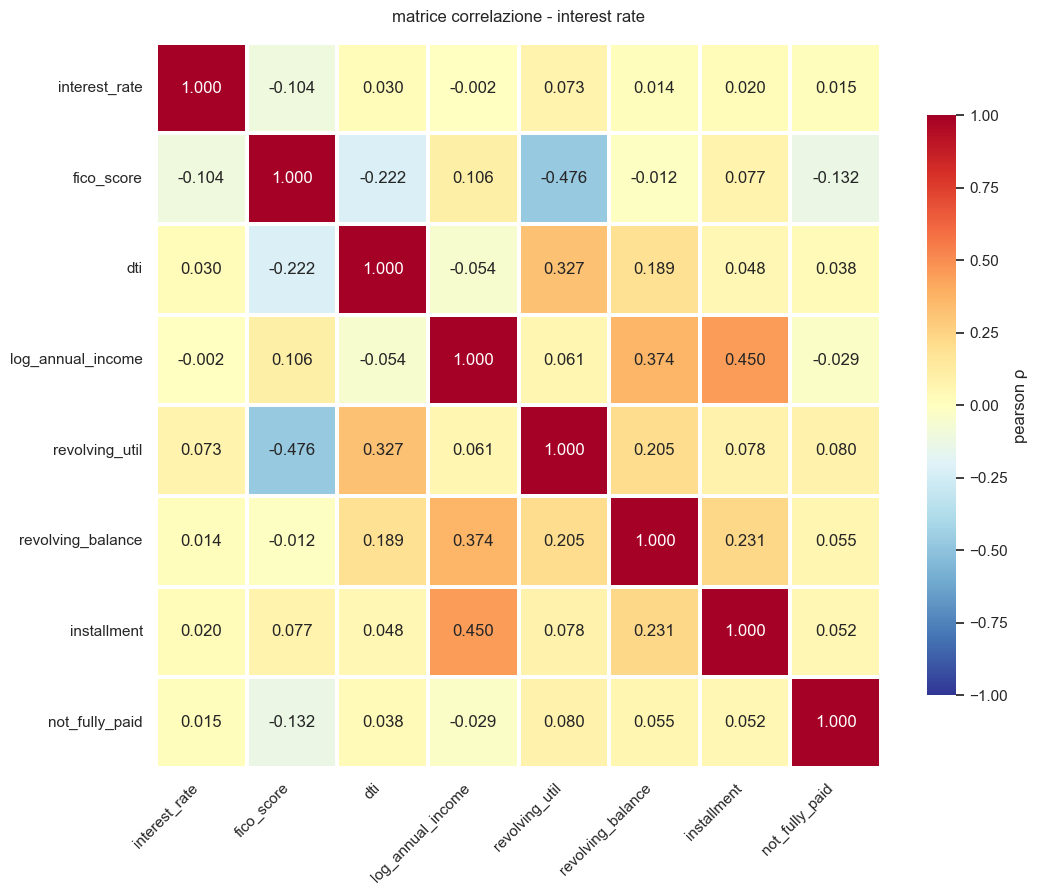

In [118]:
correlation_vars_int = ['interest_rate', 'fico_score', 'dti', 'log_annual_income', 
                        'revolving_util', 'revolving_balance', 'installment', 'not_fully_paid']

corr_matrix_int = data[correlation_vars_int].corr()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix_int, annot=True, fmt='.3f', cmap='RdYlBu_r', center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8, "label": "pearson ρ"},
            vmin=-1, vmax=1, ax=ax)
plt.title('matrice correlazione - interest rate', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.2 Distribuzioni Condizionate dell'Interest Rate

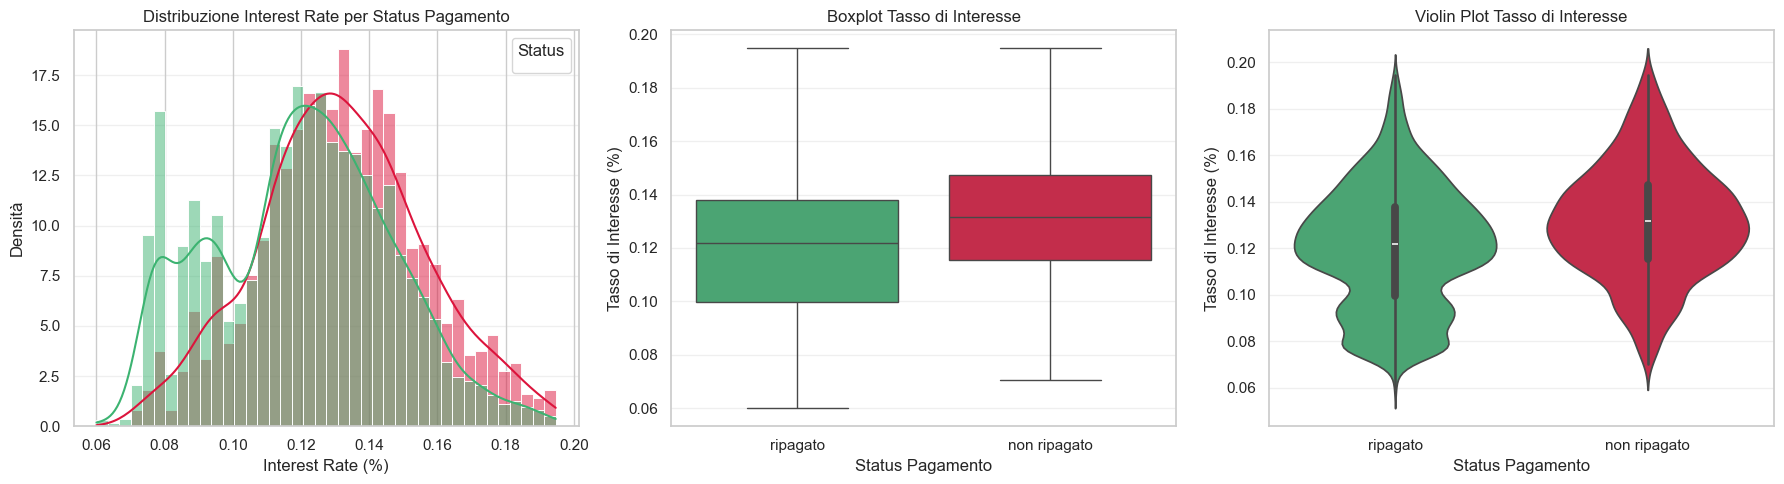


Statistiche Tasso di Interesse per Status Pagamento:

ripagato:
  media : 0.12%
  mediana: 0.12%
  std   : 0.03%

non ripagato:
  media : 0.13%
  mediana: 0.13%
  std   : 0.02%


In [119]:

data_clean = data_clean.copy()

data_clean['not_fully_paid'] = data_clean['not_fully_paid'].fillna('missing').astype(str)

base_palette = {'0': 'mediumseagreen', '1': 'crimson'}
if 'missing' in data_clean['not_fully_paid'].unique():
    base_palette['missing'] = 'lightgray' 

color_palette = base_palette 

desired_order = []
for k in ['0', '1', 'missing']:
    if k in data_clean['not_fully_paid'].unique():
        desired_order.append(k)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(
    data=data_clean,
    x='interest_rate',
    hue='not_fully_paid',
    hue_order=desired_order,
    bins=40,
    kde=True,
    palette=color_palette,
    alpha=0.5,
    ax=axes[0],
    stat='density',
    common_norm=False
)
axes[0].set_xlabel('Interest Rate (%)')
axes[0].set_ylabel('Densità')
axes[0].set_title('Distribuzione Interest Rate per Status Pagamento')

handles, labels = axes[0].get_legend_handles_labels()
friendly_labels = []
label_map = {'0': 'ripagato', '1': 'non ripagato', 'missing': 'mancante'}
for lab in labels:
    friendly_labels.append(label_map.get(lab, lab))
axes[0].legend(handles, friendly_labels, title='Status')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(
    data=data_clean,
    x='not_fully_paid',
    y='interest_rate',
    order=desired_order,
    hue='not_fully_paid',         
    hue_order=desired_order,
    palette=color_palette,
    legend=False,                 
    ax=axes[1]
)
axes[1].set_xlabel('Status Pagamento')
axes[1].set_ylabel('Tasso di Interesse (%)')
axes[1].set_title('Boxplot Tasso di Interesse')
axes[1].set_xticks(range(len(desired_order)))
axes[1].set_xticklabels([label_map.get(x, x) for x in desired_order])
axes[1].grid(True, alpha=0.3, axis='y')

sns.violinplot(
    data=data_clean,
    x='not_fully_paid',
    y='interest_rate',
    order=desired_order,
    hue='not_fully_paid',         
    hue_order=desired_order,
    palette=color_palette,
    legend=False,                 
    ax=axes[2]
)
axes[2].set_xlabel('Status Pagamento')
axes[2].set_ylabel('Tasso di Interesse (%)')
axes[2].set_title('Violin Plot Tasso di Interesse')
axes[2].set_xticks(range(len(desired_order)))
axes[2].set_xticklabels([label_map.get(x, x) for x in desired_order])
axes[2].grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()

print("\nStatistiche Tasso di Interesse per Status Pagamento:")
print("="*60)
for status in desired_order:
    int_group = data_clean.loc[data_clean['not_fully_paid'] == status, 'interest_rate'].dropna()
    status_name = label_map.get(status, status)
    if not int_group.empty:
        print(f"\n{status_name}:")
        print(f"  media : {int_group.mean():.2f}%")
        print(f"  mediana: {int_group.median():.2f}%")
        print(f"  std   : {int_group.std():.2f}%")
    else:
        print(f"\n{status_name}: Nessun dato disponibile.")


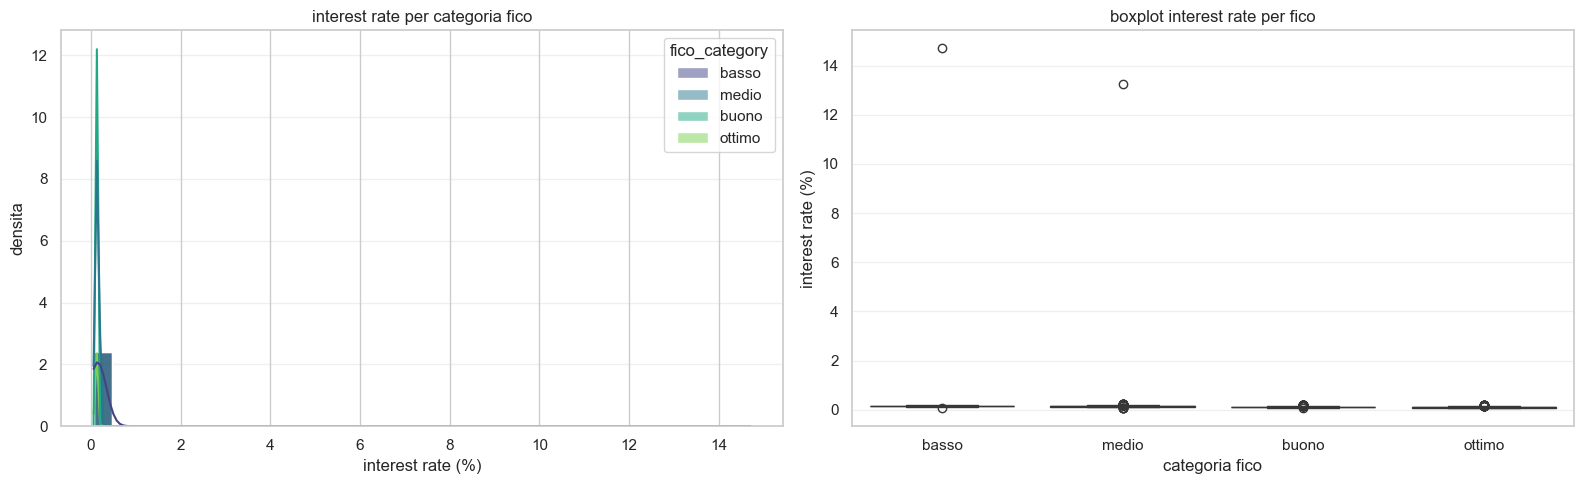

statistiche interest rate per categoria fico:

fico basso:
  media: 0.18%
  mediana: 0.15%

fico medio:
  media: 0.14%
  mediana: 0.14%

fico buono:
  media: 0.12%
  mediana: 0.12%

fico ottimo:
  media: 0.10%
  mediana: 0.09%


In [120]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(
    data=data,
    x='interest_rate',
    hue='fico_category',
    bins=35,
    kde=True,
    palette='viridis',
    alpha=0.5,
    ax=axes[0],
    stat='density',
    common_norm=False
)

axes[0].set_xlabel('interest rate (%)')
axes[0].set_ylabel('densita')
axes[0].set_title('interest rate per categoria fico')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(
    data=data,
    x='fico_category',
    y='interest_rate',
    hue='fico_category',  
    legend=False,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_xlabel('categoria fico')
axes[1].set_ylabel('interest rate (%)')
axes[1].set_title('boxplot interest rate per fico')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("statistiche interest rate per categoria fico:")
print("="*50)
for category in ['basso', 'medio', 'buono', 'ottimo']:
    int_cat = data[data['fico_category'] == category]['interest_rate']
    print(f"\nfico {category}:")
    print(f"  media: {int_cat.mean():.2f}%")
    print(f"  mediana: {int_cat.median():.2f}%")

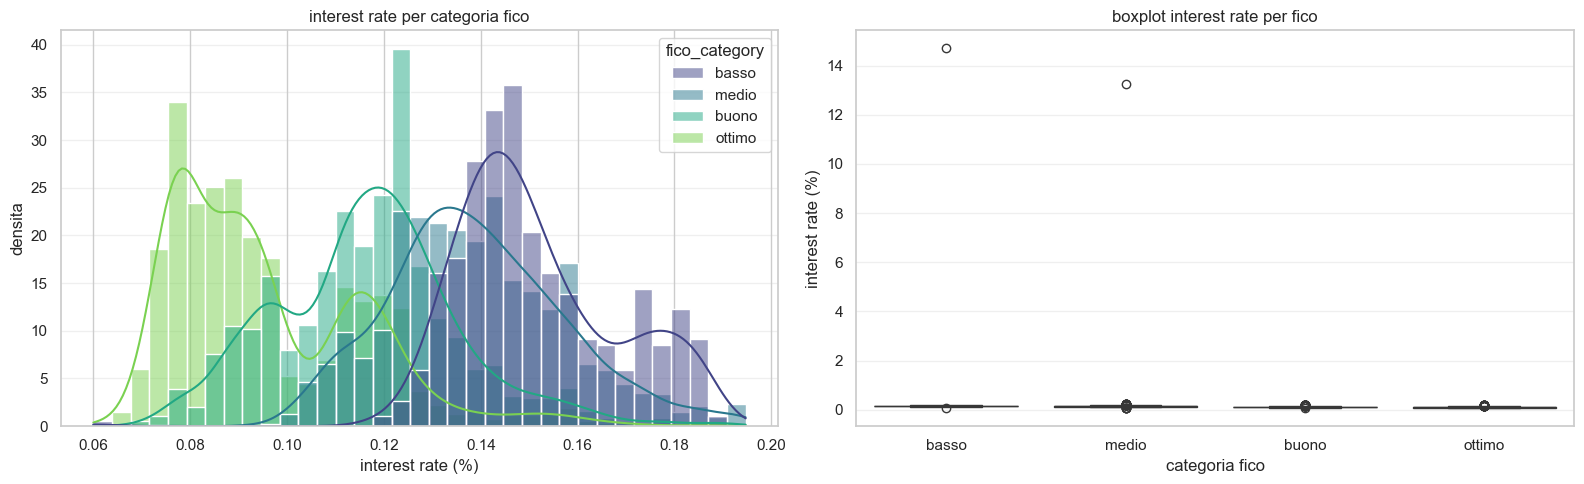

statistiche interest rate per categoria fico:

fico basso:
  media: 0.15%
  mediana: 0.15%

fico medio:
  media: 0.14%
  mediana: 0.14%

fico buono:
  media: 0.12%
  mediana: 0.12%

fico ottimo:
  media: 0.10%
  mediana: 0.09%


In [121]:
data_merged = data.copy()
data_merged['interest_rate'] = data_clean['interest_rate']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(
    data=data_merged,
    x='interest_rate',
    hue='fico_category',
    bins=35,
    kde=True,
    palette='viridis',
    alpha=0.5,
    ax=axes[0],
    stat='density',
    common_norm=False
)
axes[0].set_xlabel('interest rate (%)')
axes[0].set_ylabel('densita')
axes[0].set_title('interest rate per categoria fico')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(
    data=data,
    x='fico_category',
    y='interest_rate',
    hue='fico_category',   
    legend=False,
    palette='viridis',
    ax=axes[1]
)

axes[1].set_xlabel('categoria fico')
axes[1].set_ylabel('interest rate (%)')
axes[1].set_title('boxplot interest rate per fico')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("statistiche interest rate per categoria fico:")
print("="*50)
for category in ['basso', 'medio', 'buono', 'ottimo']:
    int_cat = data_merged[data_merged['fico_category'] == category]['interest_rate']
    print(f"\nfico {category}:")
    print(f"  media: {int_cat.mean():.2f}%")
    print(f"  mediana: {int_cat.median():.2f}%")



---
## 3. ANALISI FICO SCORE

### 3.1 Associazione FICO Score con altre variabili

In [122]:
fico_vars = ['dti', 'interest_rate', 'log_annual_income', 'revolving_util', 
            'credit_history_days', 'revolving_balance', 'not_fully_paid']

print("associazione fico score con altre variabili")
print("="*70)
print(f"{'variabile':<30} {'pearson ρ':>18} {'covariance':>18}")
print("-"*70)

fico_correlations = {}
fico_covariances = {}
for var in fico_vars:
    fico_correlations[var] = data['fico_score'].corr(data[var])
    fico_covariances[var] = data['fico_score'].cov(data[var])
    print(f"{var:<30} {fico_correlations[var]:>18.4f} {fico_covariances[var]:>18.2f}")

print("="*70)

sorted_corr_fico = sorted(fico_correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\ntop 3 correlazioni con fico score:")
for i, (var, corr) in enumerate(sorted_corr_fico[:3], 1):
    direction = "positiva" if corr > 0 else "negativa"
    print(f"  {i}. {var}: ρ = {corr:.4f} (correlazione {direction})")

associazione fico score con altre variabili
variabile                               pearson ρ         covariance
----------------------------------------------------------------------
dti                                       -0.2224             -64.37
interest_rate                             -0.1038              -0.89
log_annual_income                          0.1056               2.71
revolving_util                            -0.4759            -594.44
credit_history_days                        0.2441           25637.47
revolving_balance                         -0.0119          -16865.15
not_fully_paid                            -0.1317              -2.03

top 3 correlazioni con fico score:
  1. revolving_util: ρ = -0.4759 (correlazione negativa)
  2. credit_history_days: ρ = 0.2441 (correlazione positiva)
  3. dti: ρ = -0.2224 (correlazione negativa)


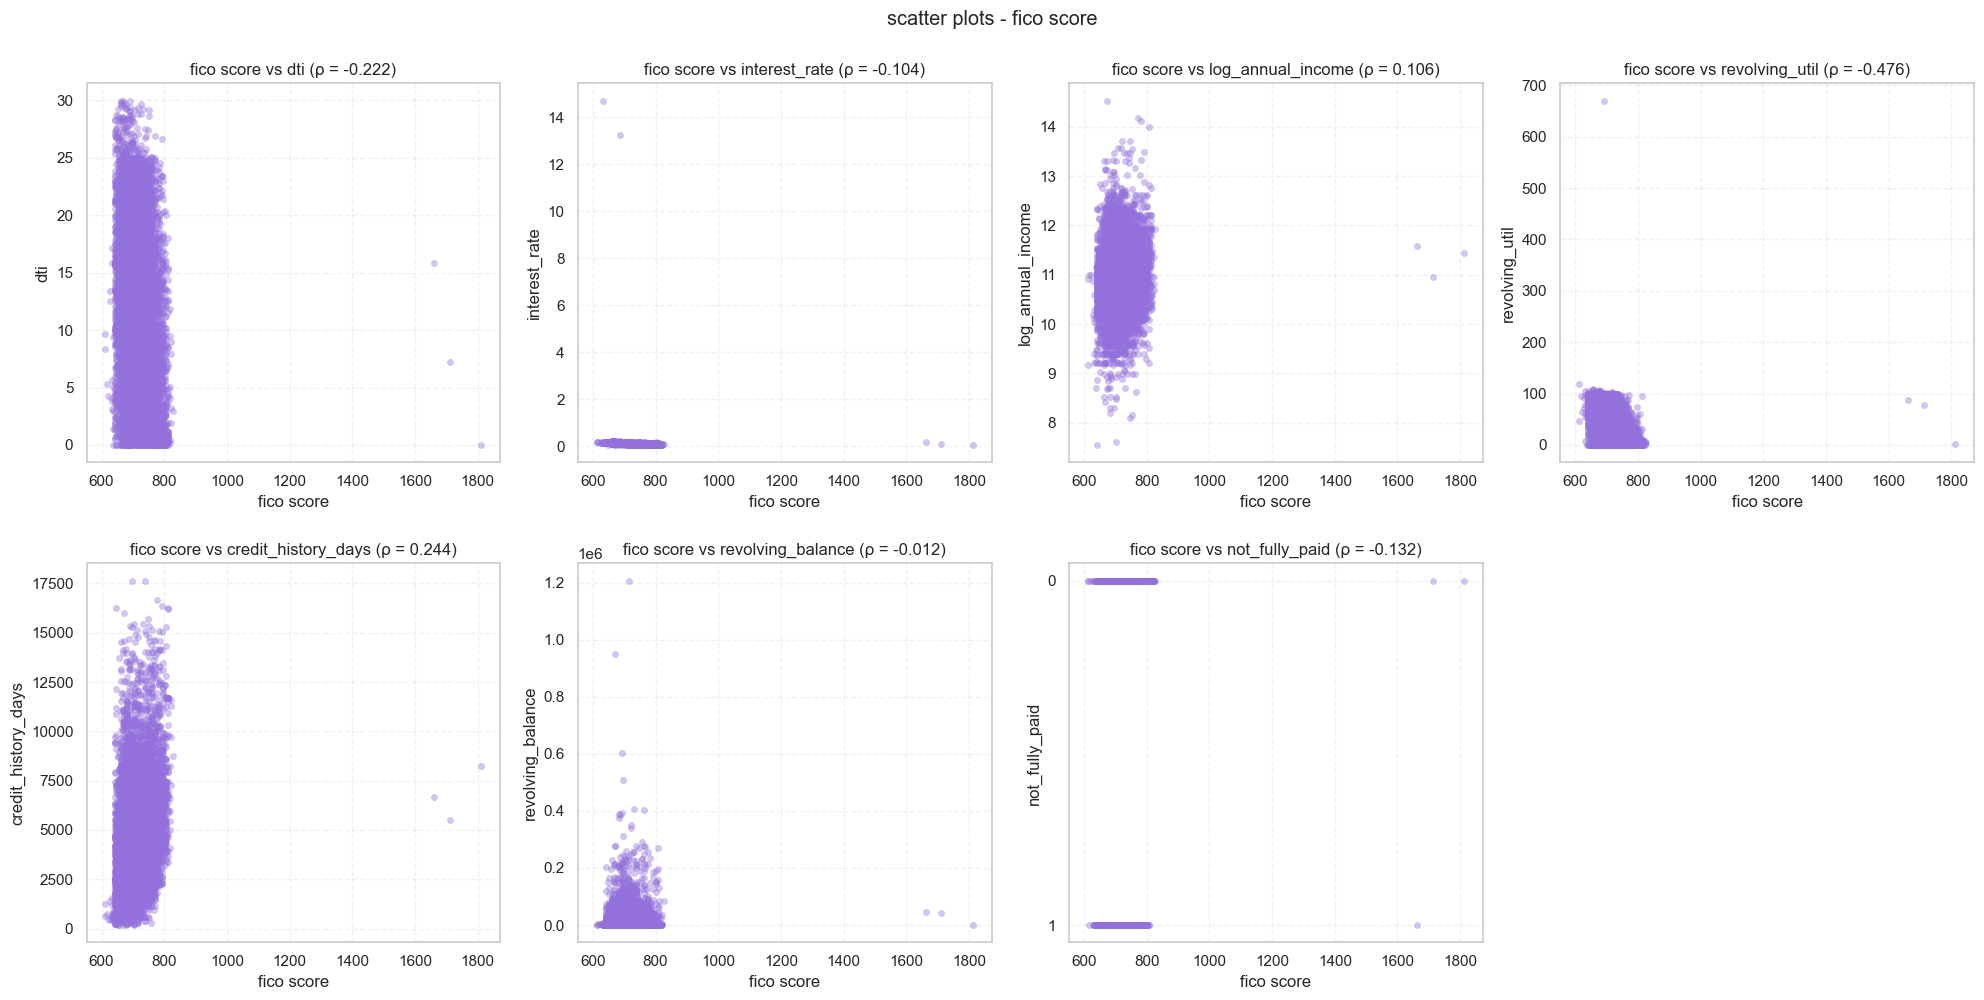

In [123]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, var in enumerate(fico_vars):
    sns.scatterplot(data=data, x='fico_score', y=var, alpha=0.4, s=20, 
                   color='mediumpurple', edgecolor=None, ax=axes[idx])
    
    axes[idx].set_xlabel('fico score')
    axes[idx].set_ylabel(var)
    axes[idx].set_title(f'fico score vs {var} (ρ = {fico_correlations[var]:.3f})')
    axes[idx].grid(True, alpha=0.3, linestyle='--')

axes[7].axis('off')

plt.suptitle('scatter plots - fico score', y=0.998)
plt.tight_layout()
plt.show()

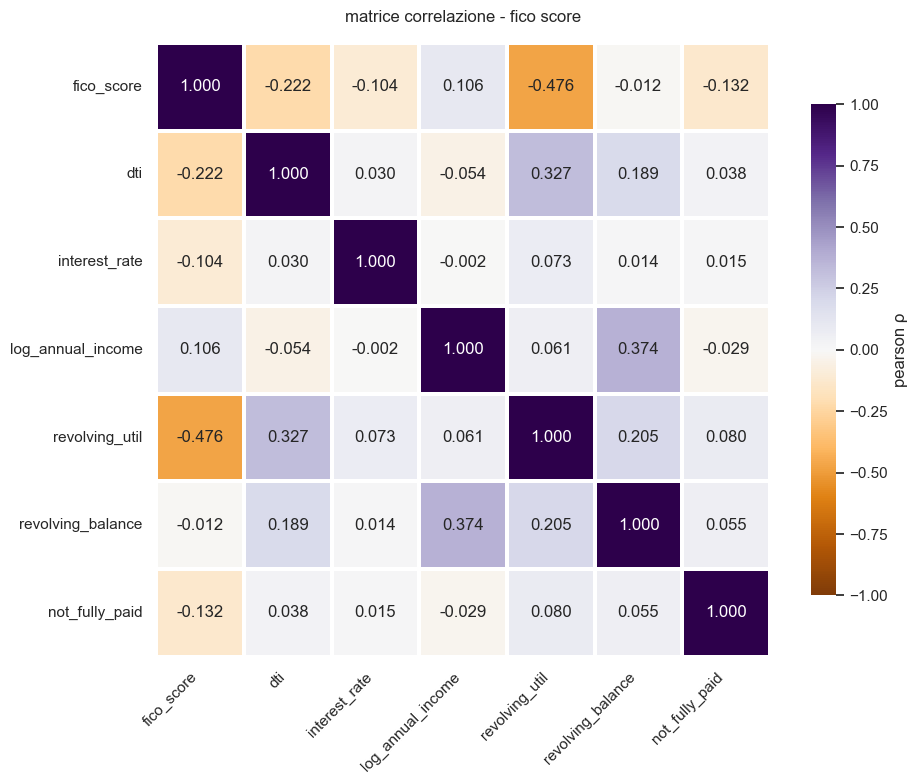

In [124]:
correlation_vars_fico = ['fico_score', 'dti', 'interest_rate', 'log_annual_income', 
                         'revolving_util', 'revolving_balance', 'not_fully_paid']

corr_matrix_fico = data[correlation_vars_fico].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fico, annot=True, fmt='.3f', cmap='PuOr', center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": 0.8, "label": "pearson ρ"},
            vmin=-1, vmax=1, ax=ax)
plt.title('matrice correlazione - fico score', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 3.2 Distribuzioni Condizionate del FICO Score

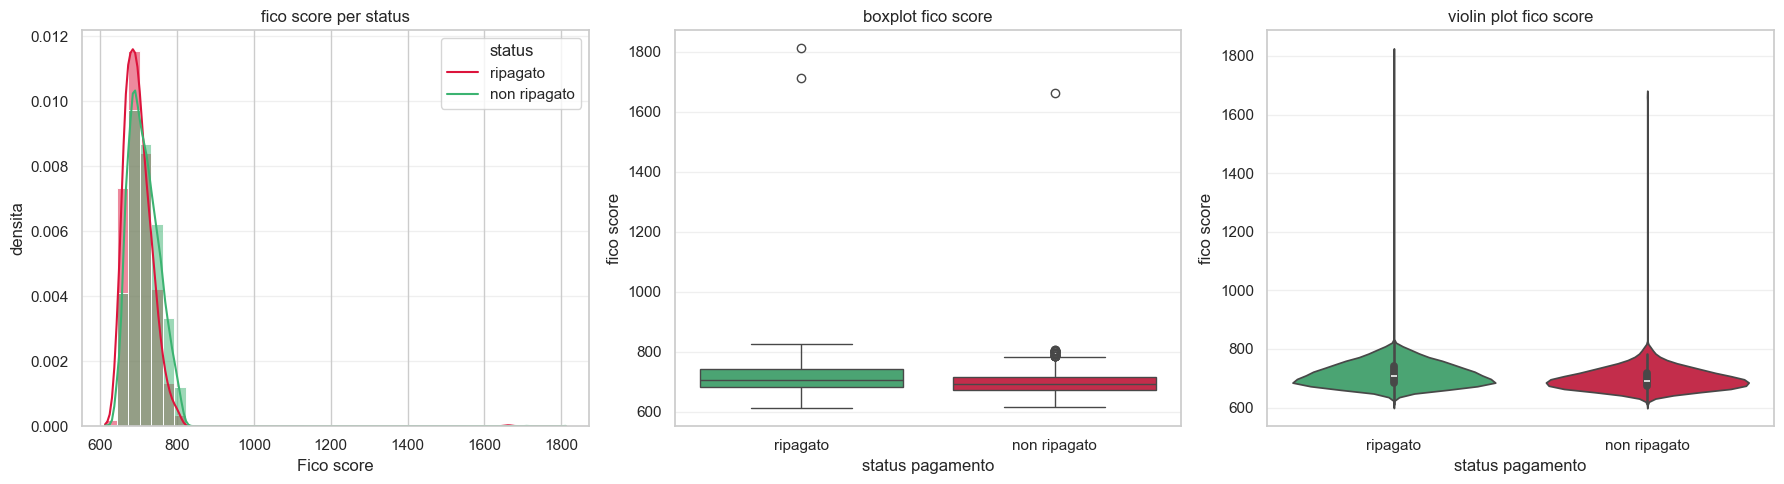

statistiche fico score per status pagamento:

non ripagato:
  media: 713.57
  mediana: 707.00
  std: 41.65

non ripagato:
  media: 698.45
  mediana: 692.00
  std: 41.76


In [125]:
color_palette ={'0': 'mediumseagreen', '1': 'crimson'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=data, x='fico_score', hue='not_fully_paid', bins=40, kde=True, 
             palette=color_palette, alpha=0.5, 
             ax=axes[0], stat='density', common_norm=False)
axes[0].set_xlabel('Fico score')
axes[0].set_ylabel('densita')
axes[0].set_title('fico score per status')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(labels=['ripagato', 'non ripagato'], title='status')
axes[0].grid(True, alpha=0.3, axis='y')

sns.boxplot(data=data, x='not_fully_paid', y='fico_score', 
           palette=color_palette, ax=axes[1], hue='not_fully_paid', legend=False)
axes[1].set_xlabel('status pagamento')
axes[1].set_ylabel('fico score')
axes[1].set_title('boxplot fico score')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['ripagato', 'non ripagato'])
axes[1].grid(True, alpha=0.3, axis='y')

sns.violinplot(data=data, x='not_fully_paid', y='fico_score', 
              palette=color_palette, ax=axes[2], hue='not_fully_paid', legend=False)
axes[2].set_xlabel('status pagamento')
axes[2].set_ylabel('fico score')
axes[2].set_title('violin plot fico score')
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(['ripagato', 'non ripagato'])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("statistiche fico score per status pagamento:")
print("="*50)

for status in ['0', '1']:
    fico_group = data[data['not_fully_paid'] == status]['fico_score']
    status_name = "ripagato" if status == 0 else "non ripagato"

    int_group = int_group.dropna()
    if not int_group.empty:
        print(f"\n{status_name}:")
        print(f"  media: {fico_group.mean():.2f}")
        print(f"  mediana: {fico_group.median():.2f}")
        print(f"  std: {fico_group.std():.2f}")
    else:
        print("\n{status_name}: Non sono stati trovati dati validi per questo status.")

---
## 4. ANALISI CONGIUNTA: Joint Distributions

visualizziamo le distribuzioni congiunte tra le tre variabili principali usando joint plots con scatter e distribuzioni marginali

In [126]:
"""g1 = sns.jointplot(data=data_clean, x='fico_score', y='interest_rate', 
                   kind='scatter', alpha=0.3, height=8, 
                   marginal_kws=dict(bins=40, kde=True),
                   joint_kws=dict(s=15, color='steelblue'))
g1.ax_joint.set_xlabel('fico score')
g1.ax_joint.set_ylabel('interest rate (%)')
g1.fig.suptitle(f'joint distribution: fico score vs interest rate (ρ = {data["fico_score"].corr(data_clean["interest_rate"]):.3f})', y=1.02)
plt.tight_layout()
plt.show()"""

'g1 = sns.jointplot(data=data_clean, x=\'fico_score\', y=\'interest_rate\', \n                   kind=\'scatter\', alpha=0.3, height=8, \n                   marginal_kws=dict(bins=40, kde=True),\n                   joint_kws=dict(s=15, color=\'steelblue\'))\ng1.ax_joint.set_xlabel(\'fico score\')\ng1.ax_joint.set_ylabel(\'interest rate (%)\')\ng1.fig.suptitle(f\'joint distribution: fico score vs interest rate (ρ = {data["fico_score"].corr(data_clean["interest_rate"]):.3f})\', y=1.02)\nplt.tight_layout()\nplt.show()'

In [127]:
"""g2 = sns.jointplot(data=data, x='fico_score', y='dti', 
                   kind='scatter', alpha=0.3, height=8,
                   marginal_kws=dict(bins=40, kde=True),
                   joint_kws=dict(s=15, color='darkorange'))
g2.ax_joint.set_xlabel('fico score')
g2.ax_joint.set_ylabel('dti (%)')
g2.fig.suptitle(f'joint distribution: fico score vs dti (ρ = {data["fico_score"].corr(data["dti"]):.3f})', y=1.02)
plt.tight_layout()
plt.show()"""

'g2 = sns.jointplot(data=data, x=\'fico_score\', y=\'dti\', \n                   kind=\'scatter\', alpha=0.3, height=8,\n                   marginal_kws=dict(bins=40, kde=True),\n                   joint_kws=dict(s=15, color=\'darkorange\'))\ng2.ax_joint.set_xlabel(\'fico score\')\ng2.ax_joint.set_ylabel(\'dti (%)\')\ng2.fig.suptitle(f\'joint distribution: fico score vs dti (ρ = {data["fico_score"].corr(data["dti"]):.3f})\', y=1.02)\nplt.tight_layout()\nplt.show()'

In [128]:
"""g3 = sns.jointplot(data=data_clean, x='dti', y='interest_rate', 
                   kind='scatter', alpha=0.3, height=8,
                   marginal_kws=dict(bins=40, kde=True),
                   joint_kws=dict(s=15, color='mediumpurple'))
g3.ax_joint.set_xlabel('dti (%)')
g3.ax_joint.set_ylabel('interest rate (%)')
g3.fig.suptitle(f'joint distribution: dti vs interest rate (ρ = {data["dti"].corr(data_clean["interest_rate"]):.3f})', y=1.02)
plt.tight_layout()
plt.show()"""

'g3 = sns.jointplot(data=data_clean, x=\'dti\', y=\'interest_rate\', \n                   kind=\'scatter\', alpha=0.3, height=8,\n                   marginal_kws=dict(bins=40, kde=True),\n                   joint_kws=dict(s=15, color=\'mediumpurple\'))\ng3.ax_joint.set_xlabel(\'dti (%)\')\ng3.ax_joint.set_ylabel(\'interest rate (%)\')\ng3.fig.suptitle(f\'joint distribution: dti vs interest rate (ρ = {data["dti"].corr(data_clean["interest_rate"]):.3f})\', y=1.02)\nplt.tight_layout()\nplt.show()'

---
## 5. SINTESI DELLE ASSOCIAZIONI

matrice finale che riassume tutte le principali correlazioni trovate

In [129]:
"""main_vars = ['fico_score', 'interest_rate', 'dti', 'log_annual_income', 
             'revolving_util', 'revolving_balance', 'credit_history_days', 
             'installment', 'not_fully_paid']

final_corr_matrix = data[main_vars].corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool), k=1)

sns.heatmap(final_corr_matrix, mask=mask, annot=True, fmt='.3f', 
            cmap='coolwarm', center=0, square=True, linewidths=2, 
            cbar_kws={"shrink": 0.8, "label": "pearson ρ"},
            vmin=-1, vmax=1, ax=ax)

plt.title('matrice correlazione completa - variabili principali', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()"""

'main_vars = [\'fico_score\', \'interest_rate\', \'dti\', \'log_annual_income\', \n             \'revolving_util\', \'revolving_balance\', \'credit_history_days\', \n             \'installment\', \'not_fully_paid\']\n\nfinal_corr_matrix = data[main_vars].corr()\n\nfig, ax = plt.subplots(figsize=(12, 10))\nmask = np.triu(np.ones_like(final_corr_matrix, dtype=bool), k=1)\n\nsns.heatmap(final_corr_matrix, mask=mask, annot=True, fmt=\'.3f\', \n            cmap=\'coolwarm\', center=0, square=True, linewidths=2, \n            cbar_kws={"shrink": 0.8, "label": "pearson ρ"},\n            vmin=-1, vmax=1, ax=ax)\n\nplt.title(\'matrice correlazione completa - variabili principali\', pad=20)\nplt.xticks(rotation=45, ha=\'right\')\nplt.yticks(rotation=0)\nplt.tight_layout()\nplt.show()'